In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score,\
roc_auc_score, roc_curve, auc
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from scipy import stats as st
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import random as r
import math as m
from math import *
%matplotlib inline

In [2]:

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

# EXPLORATORY DATA ANALYSIS

In [3]:
df[df['age']==0.08]

id  gender   age  hypertension  heart_disease ever_married work_type  \
1614  47350  Female  0.08             0              0           No  children   
3295  29955    Male  0.08             0              0           No  children   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
1614          Urban             139.67  14.1        Unknown       0  
3295          Rural              70.33  16.9        Unknown       0

In [4]:
df1 = df.copy()

In [5]:
df2 = df.copy()

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.shape

(5110, 12)

In [8]:
df.size

61320

In [9]:
df.ndim

2

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [13]:
df.sample(3)

id  gender   age  hypertension  heart_disease ever_married  \
4542  32126  Female  56.0             0              1          Yes   
2886    966  Female  70.0             1              0          Yes   
3862  48871  Female  54.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi smoking_status  \
4542        Private          Urban              91.89  23.3         smokes   
2886  Self-employed          Rural             103.89  30.0   never smoked   
3862        Private          Rural              68.60  44.8         smokes   

      stroke  
4542       0  
2886       0  
3862       0

In [14]:
df.iloc[[603, 621, 639, 654, 668]][:]

id  gender   age  hypertension  heart_disease ever_married  \
603  61408    Male  23.0             0              0           No   
621  42553  Female  80.0             0              0          Yes   
639  63693    Male  37.0             0              0           No   
654  30567    Male  71.0             1              0          Yes   
668  68995  Female  48.0             1              0           No   

        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
603  Never_worked          Urban             125.26  18.7     never smoked   
621       Private          Rural             148.91  28.3     never smoked   
639       Private          Urban              67.39  35.6          Unknown   
654       Private          Urban              94.65  25.3  formerly smoked   
668       Private          Rural             118.14   NaN  formerly smoked   

     stroke  
603       0  
621       0  
639       0  
654       0  
668       0

In [15]:
df.iloc[[3663]]['stroke']

3663    0
Name: stroke, dtype: int64

In [16]:
df.set_index("id", drop = True, inplace = True)
df

gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234  Female  80.0             1              0          Yes        Private   
44873  Female  81.0             0              0          Yes  Self-employed   
19723  Female  35.0             0              0          Yes  Self-employed   
37544    Male  51.0             0              0          Yes        Private   
44679  Female  44.0             0              0          Yes       Govt_job   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182          Urban             171.23  34.4           smokes       1  
1665           Rural             174.12  24.0     never smoked       1  
...              ...                ...   ...              ...     ...  
18234          Urban              83.75   NaN     never smoked       0  
44873          Urban             125.20  40.0     never smoked       0  
19723          Rural              82.99  30.6     never smoked       0  
37544          Rural             166.29  25.6  formerly smoked       0  
44679          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

In [17]:
df.loc[[31112]]

gender   age  hypertension  heart_disease ever_married work_type  \
id                                                                       
31112   Male  80.0             0              1          Yes   Private   

      Residence_type  avg_glucose_level   bmi smoking_status  stroke  
id                                                                    
31112          Rural             105.92  32.5   never smoked       1

In [18]:
df.loc[[18234],['stroke']]

stroke
id           
18234       0

In [19]:
df.loc[df.gender=='Male'][['stroke']].count()

stroke    2115
dtype: int64

In [20]:
df.loc[[19723], 'avg_glucose_level':'stroke']

avg_glucose_level   bmi smoking_status  stroke
id                                                   
19723              82.99  30.6   never smoked       0

In [21]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:>

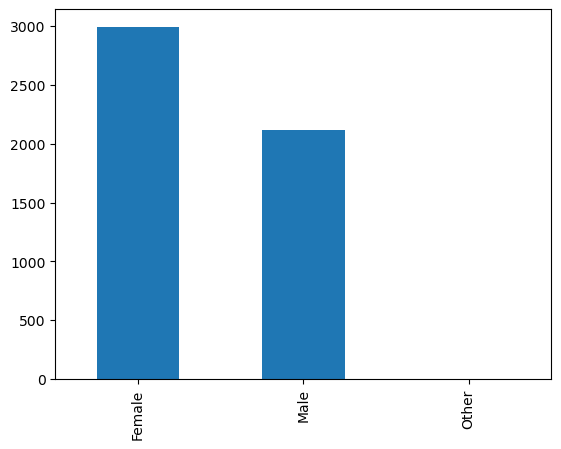

In [22]:
df['gender'].value_counts().plot(kind='bar')

In [23]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [24]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [25]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [26]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [27]:
df[(df['age'] > 50) & (df['heart_disease']==1)][['age','heart_disease']].head()

age  heart_disease
id                        
9046   67.0              1
31112  80.0              1
53882  74.0              1
12095  61.0              1
8213   78.0              1

In [28]:
df.loc[df['smoking_status'].str.contains('never')]

gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   
53882    Male  74.0             1              1          Yes        Private   
10434  Female  69.0             0              0           No        Private   
...       ...   ...           ...            ...          ...            ...   
68398    Male  82.0             1              0          Yes  Self-employed   
45010  Female  57.0             0              0          Yes        Private   
18234  Female  80.0             1              0          Yes        Private   
44873  Female  81.0             0              0          Yes  Self-employed   
19723  Female  35.0             0              0          Yes  Self-employed   

      Residence_type  avg_glucose_level   bmi smoking_status  stroke  
id                                                                    
51676          Rural             202.21   NaN   never smoked       1  
31112          Rural             105.92  32.5   never smoked       1  
1665           Rural             174.12  24.0   never smoked       1  
53882          Rural              70.09  27.4   never smoked       1  
10434          Urban              94.39  22.8   never smoked       1  
...              ...                ...   ...            ...     ...  
68398          Rural              71.97  28.3   never smoked       0  
45010          Rural              77.93  21.7   never smoked       0  
18234          Urban              83.75   NaN   never smoked       0  
44873          Urban             125.20  40.0   never smoked       0  
19723          Rural              82.99  30.6   never smoked       0  

[1892 rows x 11 columns]

In [29]:
df.groupby(['gender','stroke'])['stroke'].count().unstack()

stroke       0      1
gender               
Female  2853.0  141.0
Male    2007.0  108.0
Other      1.0    NaN

In [30]:
pd.crosstab(index=df['age'],columns='count').sort_values(['count'],ascending=False)  

col_0  count
age         
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
...      ...
1.40       3
0.16       3
0.48       3
0.40       2
0.08       2

[104 rows x 1 columns]

In [31]:
df.groupby('stroke')['age','avg_glucose_level'].mean() #Average age and estimated salary 

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21908\1752368703.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('stroke')['age','avg_glucose_level'].mean() #Average age and estimated salary


age  avg_glucose_level
stroke                              
0       41.971545         104.795513
1       67.728193         132.544739

# FEATURE ENGINEERING

## HANDLING MISSING & NULL VALUES

In [32]:
df1.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

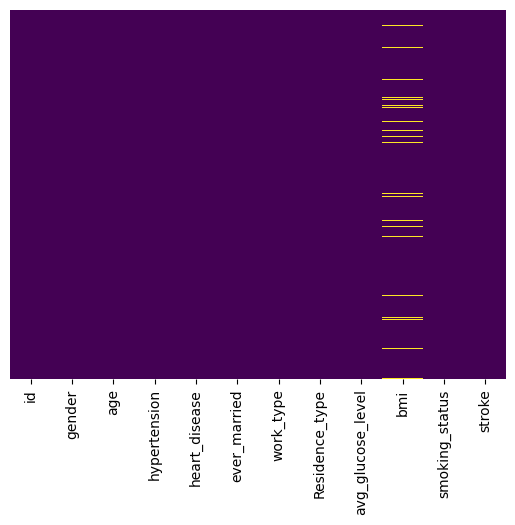

In [33]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
print(df1['bmi'].mean())
print(df1['bmi'].median())

28.893236911794673
28.1


In [35]:
bmi_mean=df1['bmi'].mean()
df1['bmi']=df1['bmi'].fillna(bmi_mean)

In [36]:
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

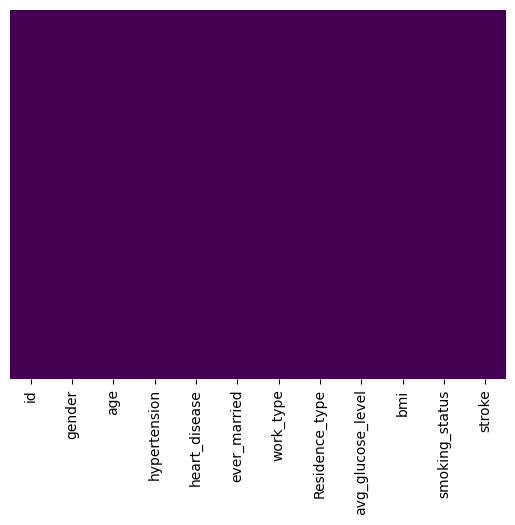

In [37]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
df1.duplicated().sum()

0

# DATA VISUALIZATION

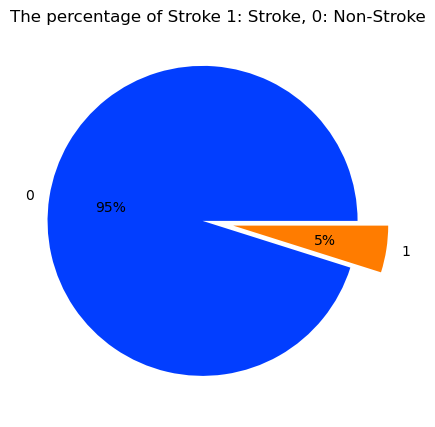

In [39]:
data = df["stroke"].value_counts()
labels = df["stroke"].value_counts().index

fig = plt.figure(figsize =(5, 7))
palette_color = sns.color_palette('bright')
plt.pie(data, labels=labels, colors=palette_color, autopct='%.0f%%', explode=[0.1, 0.1])
plt.title("The percentage of Stroke 1: Stroke, 0: Non-Stroke");


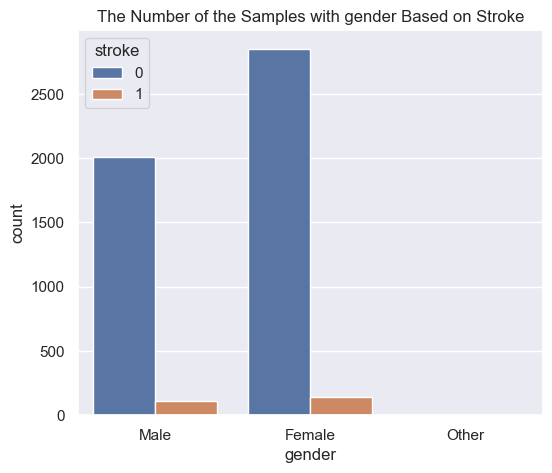

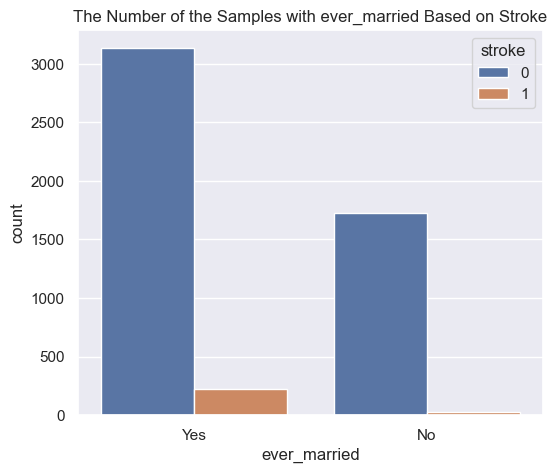

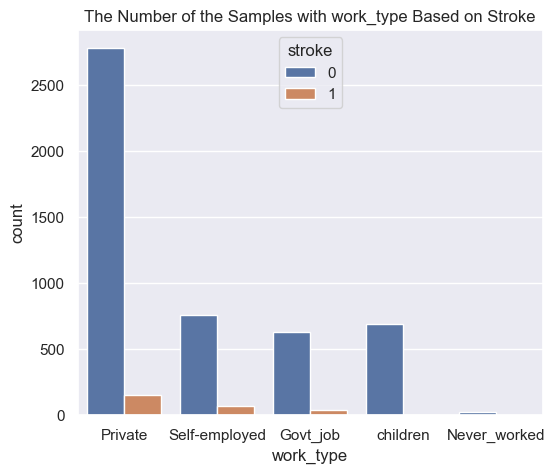

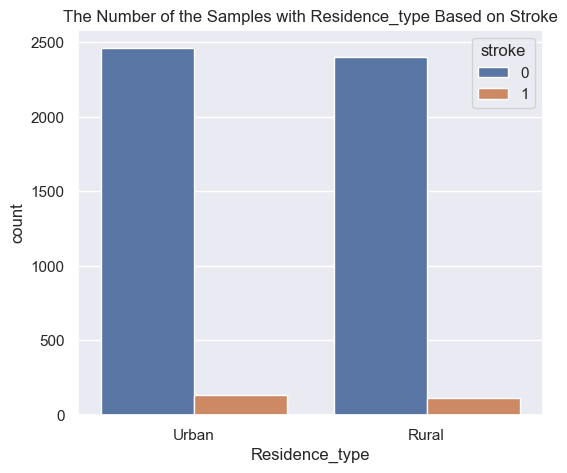

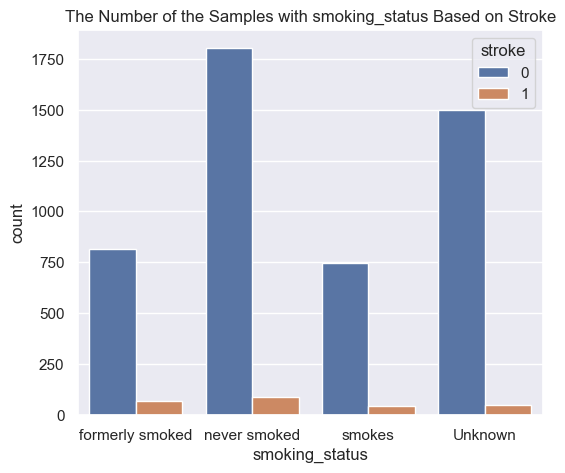

In [40]:
plt.rcParams['figure.figsize']=(6.0,5.0)
sns.set_theme(style = 'darkgrid')
for i in df.columns[:-1]:  # exclude stroke column
    if (df[i].dtype == 'object'):
            sns.countplot(data = df, x = i, hue = 'stroke')
            plt.title('The Number of the Samples with {} Based on Stroke'.format(i))
            plt.show()

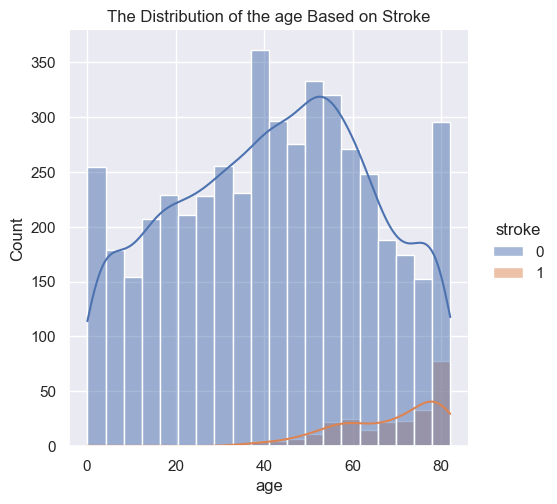

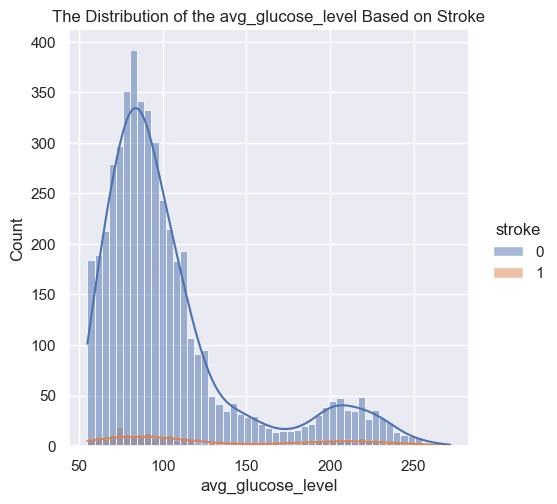

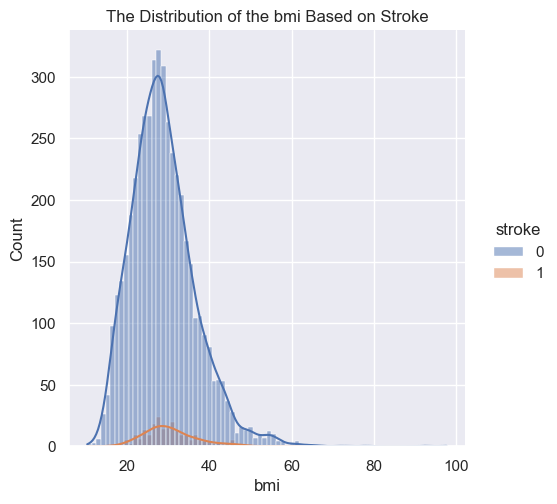

In [41]:
sns.set_theme(style = 'darkgrid')
for i in df.columns[:-1]: # exclude stroke column
    if df[i].dtype == 'float64':
            sns.displot(data = df, x = i, hue = 'stroke', kde = True)
            plt.title('The Distribution of the {} Based on Stroke'.format(i))
            plt.show()

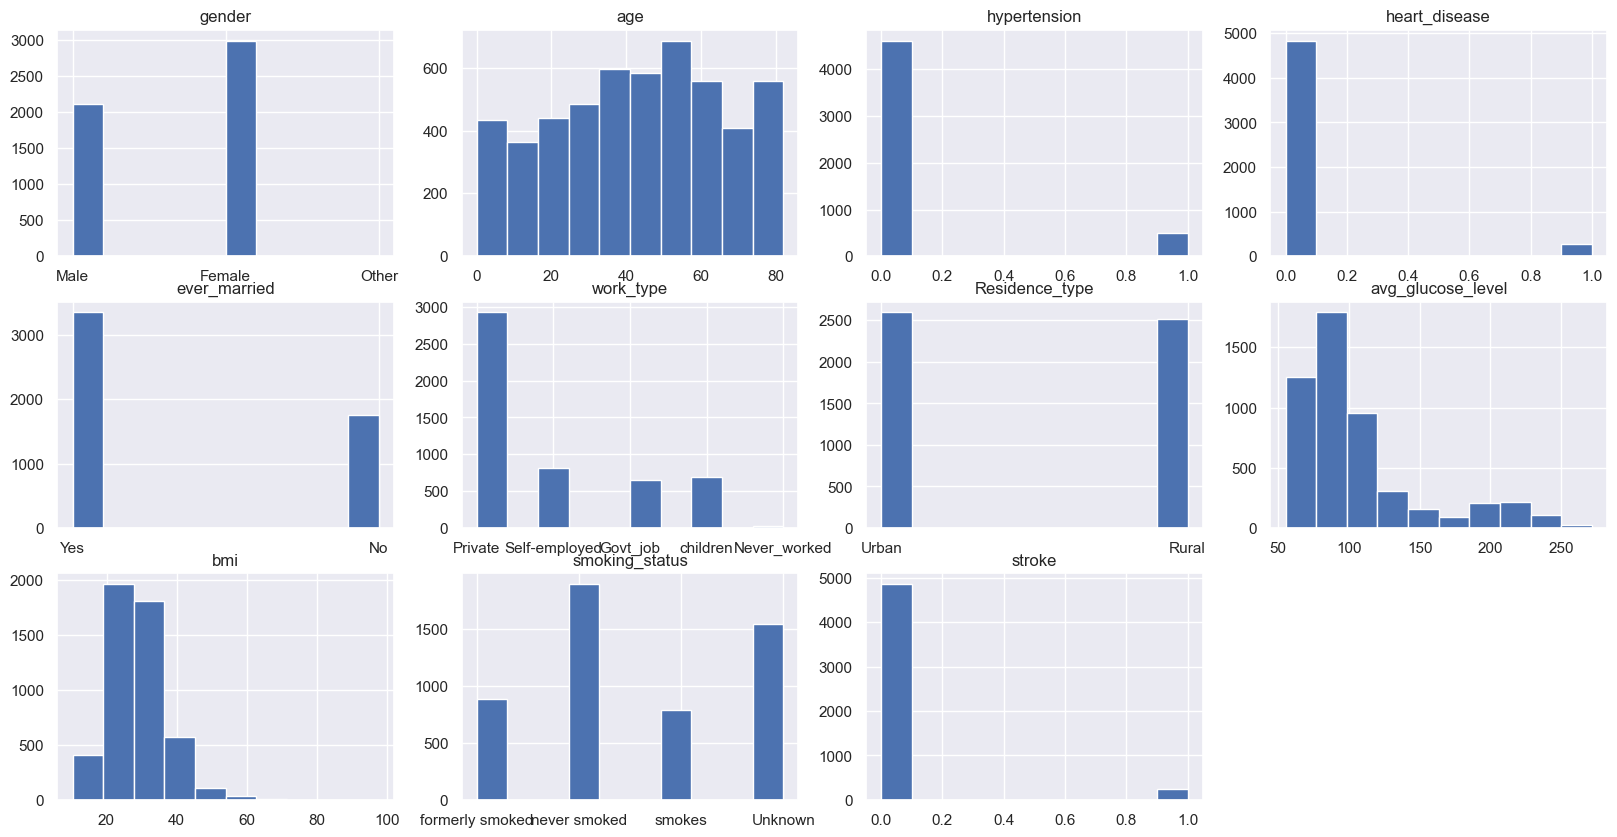

In [42]:
plt.rcParams["figure.figsize"] = (20,10)
index = 1
for column in df.columns:
    plt.subplot(3,4,index)
    plt.title(column)
    plt.hist(df[column], label=column)
    index += 1
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='age'>

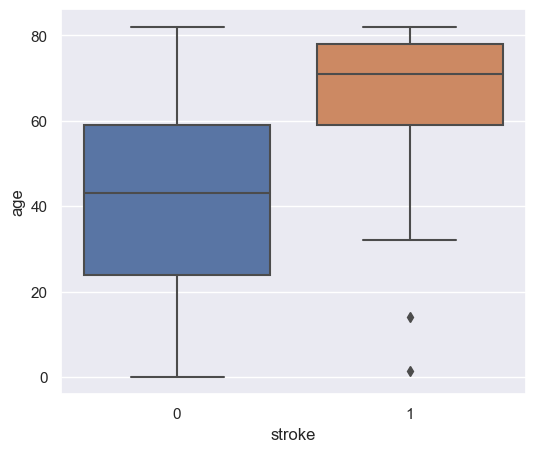

In [43]:
plt.rcParams["figure.figsize"] = (6,5)
sns.boxplot(data=df, x="stroke", y='age') #checking for outliers

In [44]:
df1.shape

(5110, 12)

In [45]:
strokee = df[df['stroke']==1]

In [46]:
Q1 = np.percentile(strokee['age'], 25,interpolation = 'midpoint')
Q3 = np.percentile(strokee['age'], 75,interpolation = 'midpoint')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21908\1087659259.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(strokee['age'], 25,interpolation = 'midpoint')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_21908\1087659259.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(strokee['age'], 75,interpolation = 'midpoint')


In [47]:
Q1

59.0

In [48]:
Q3

78.0

In [49]:
IQR = Q3 - Q1
print(IQR)

19.0


In [50]:
upper = np.where(strokee['age'] >= (Q3+1.5*IQR))
lower = np.where(strokee['age'] <= (Q1-1.5*IQR))

In [51]:
print(upper[0])
print(lower[0])

[]
[162 245]


In [52]:
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

In [53]:
df1.shape

(5108, 12)

<AxesSubplot:xlabel='stroke', ylabel='age'>

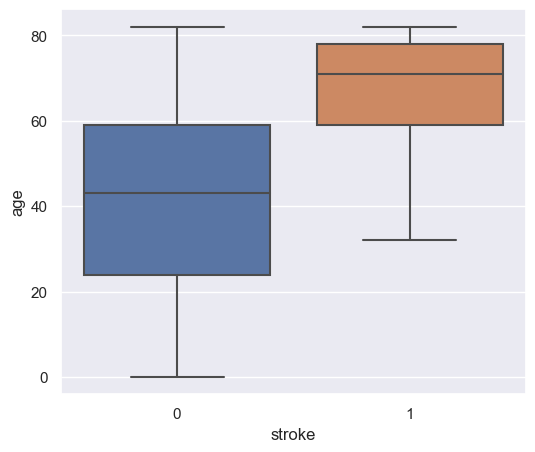

In [54]:
plt.rcParams["figure.figsize"] = (6,5)
sns.boxplot(data=df1, x="stroke", y='age') #Removed outliers

0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:>

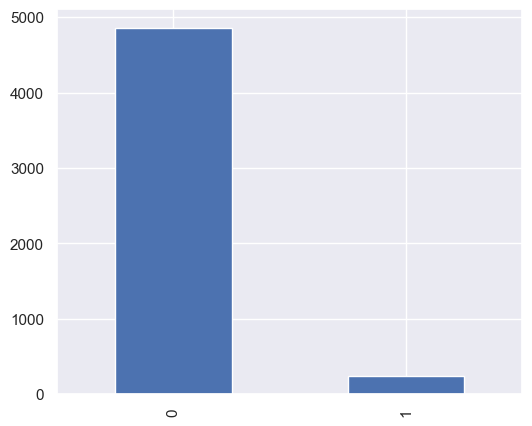

In [55]:
print(df['stroke'].value_counts())
df['stroke'].value_counts().sort_index().plot.bar()

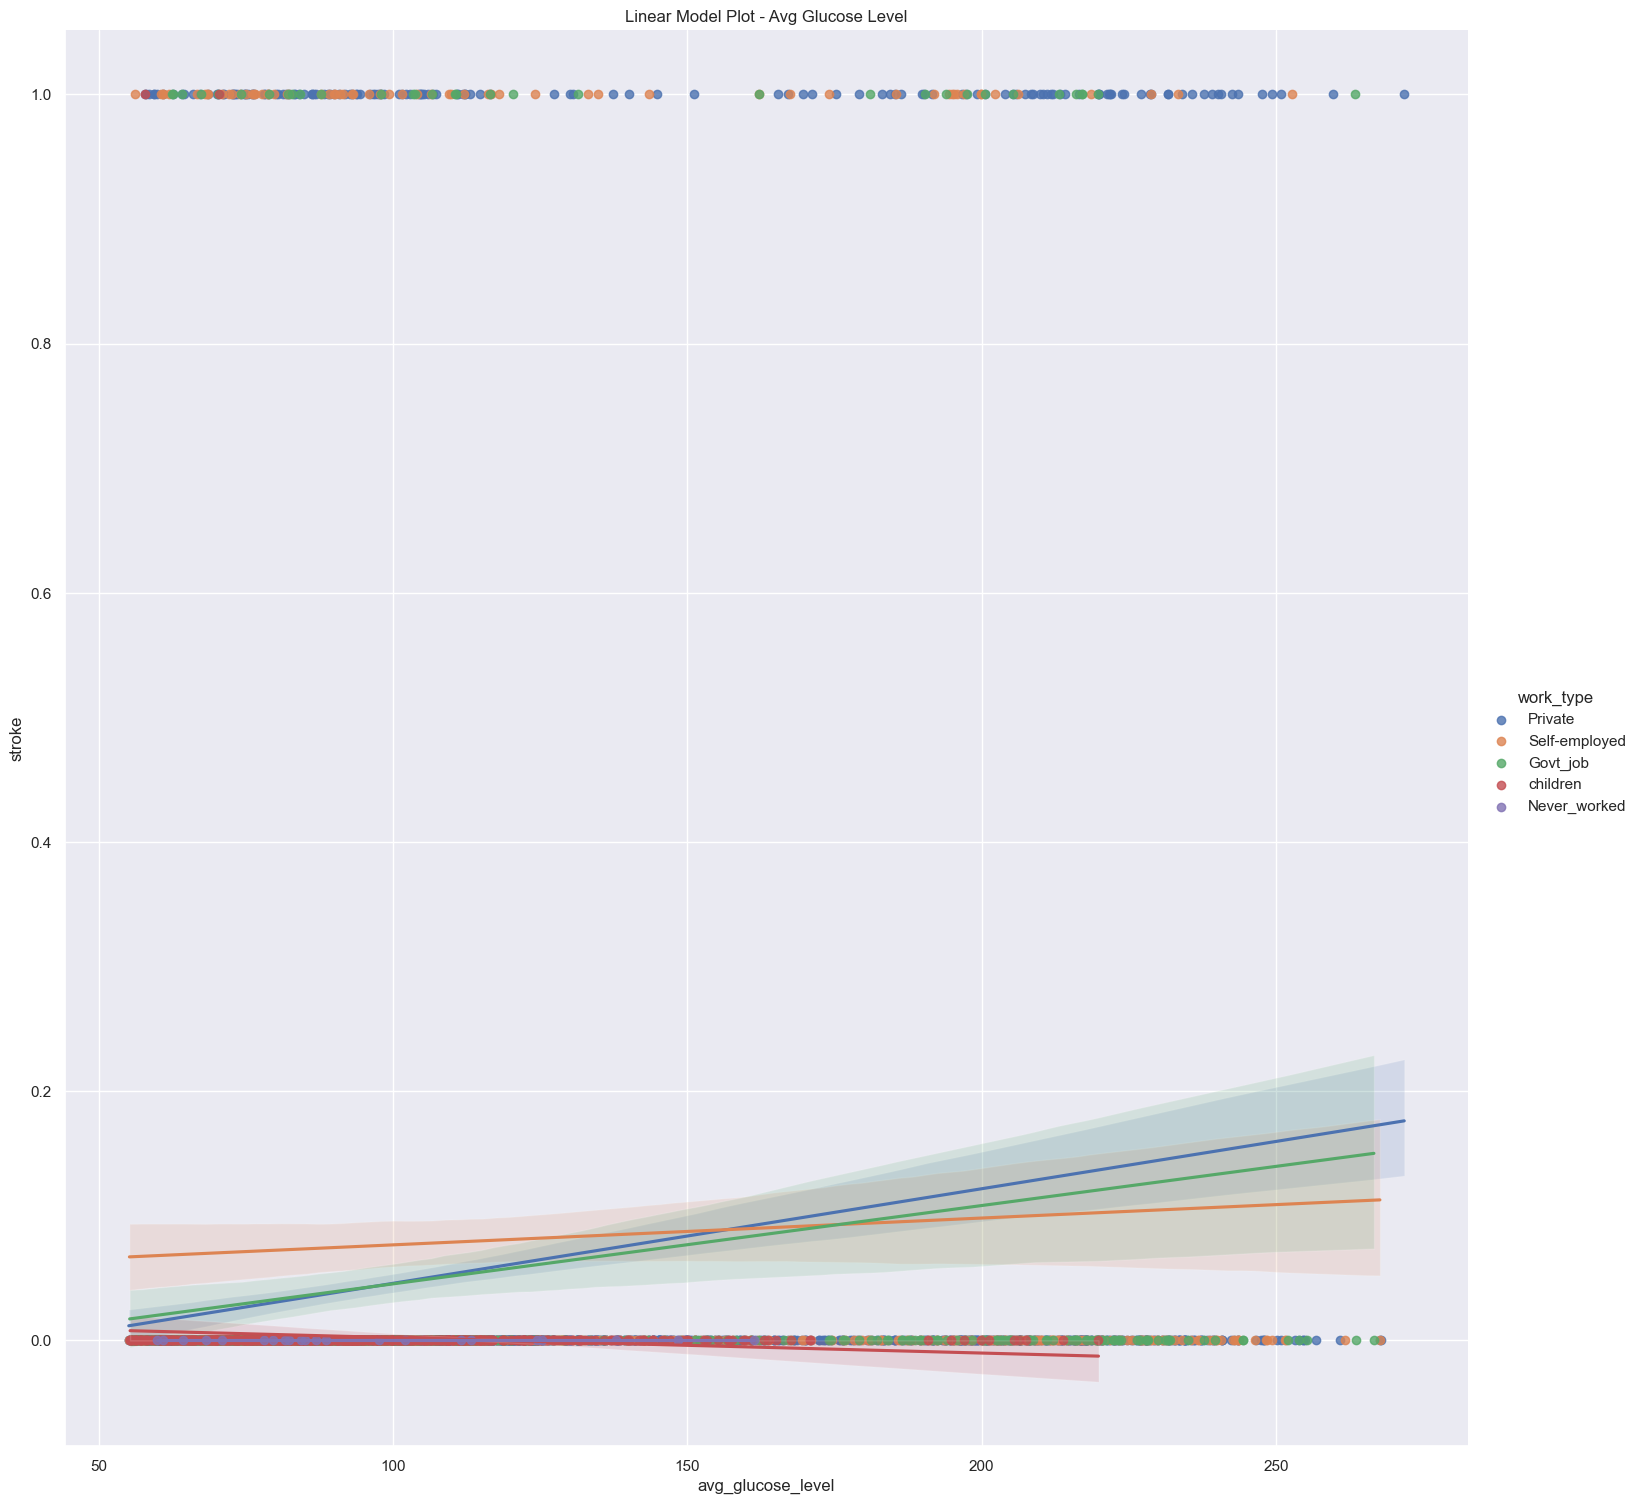

In [56]:
sns.lmplot(x='avg_glucose_level',y='stroke',data = df, height=15, hue='work_type')
x = plt.gca()
x.set_title('Linear Model Plot - Avg Glucose Level')
plt.show()

Text(0.5, 1.0, 'avg_glucose_level')

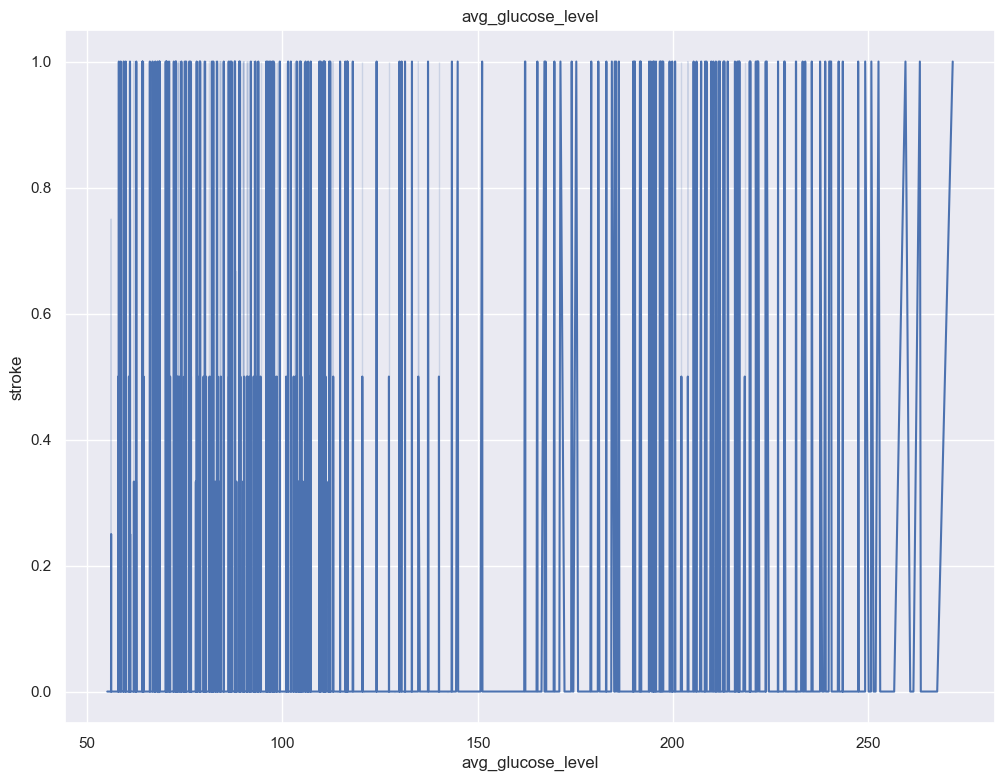

In [57]:
plt.rcParams['figure.figsize']=(12.0,9.0)
sns.lineplot(x="avg_glucose_level", y="stroke", data=df) 
sns.set(style='dark')
plt.title('avg_glucose_level')

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot - BMI')

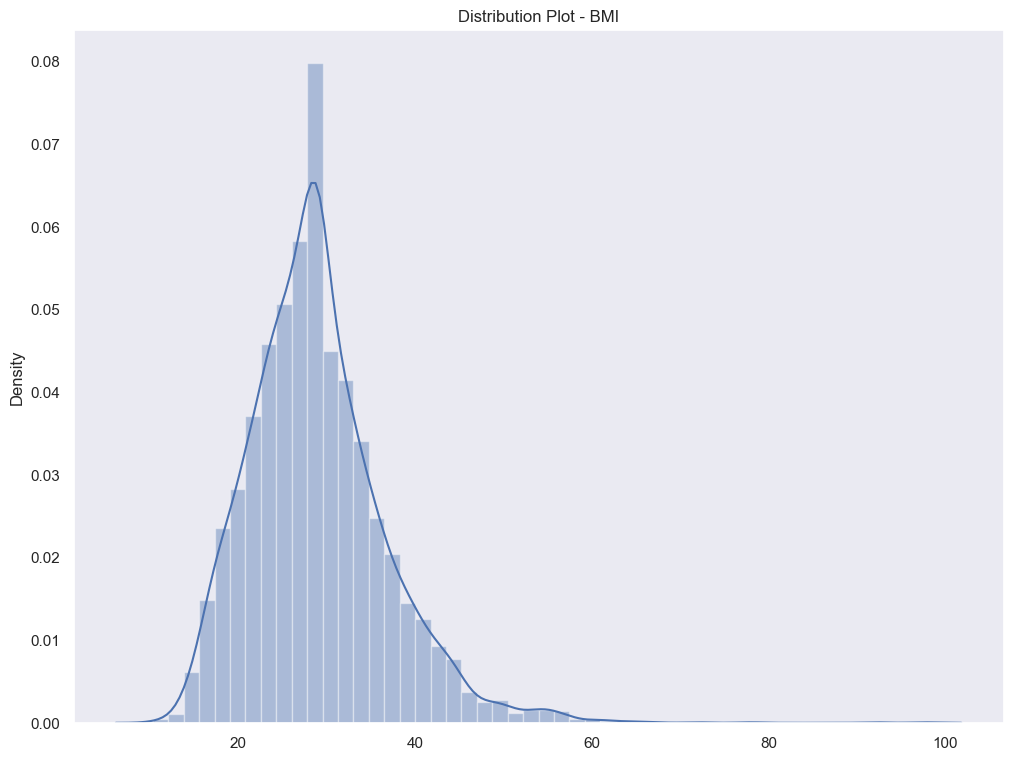

In [58]:
bmi_values=df1.iloc[:]['bmi'].values
sns.distplot(x=bmi_values)
plt.title('Distribution Plot - BMI')

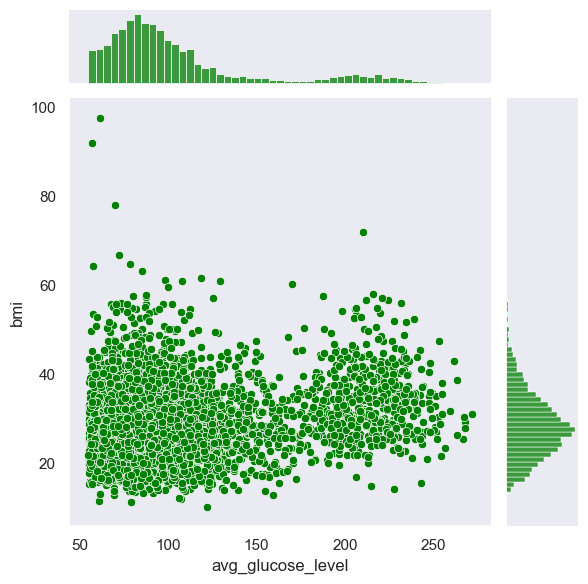

In [59]:
sns.jointplot(x='avg_glucose_level',y='bmi',color="green",data=df)

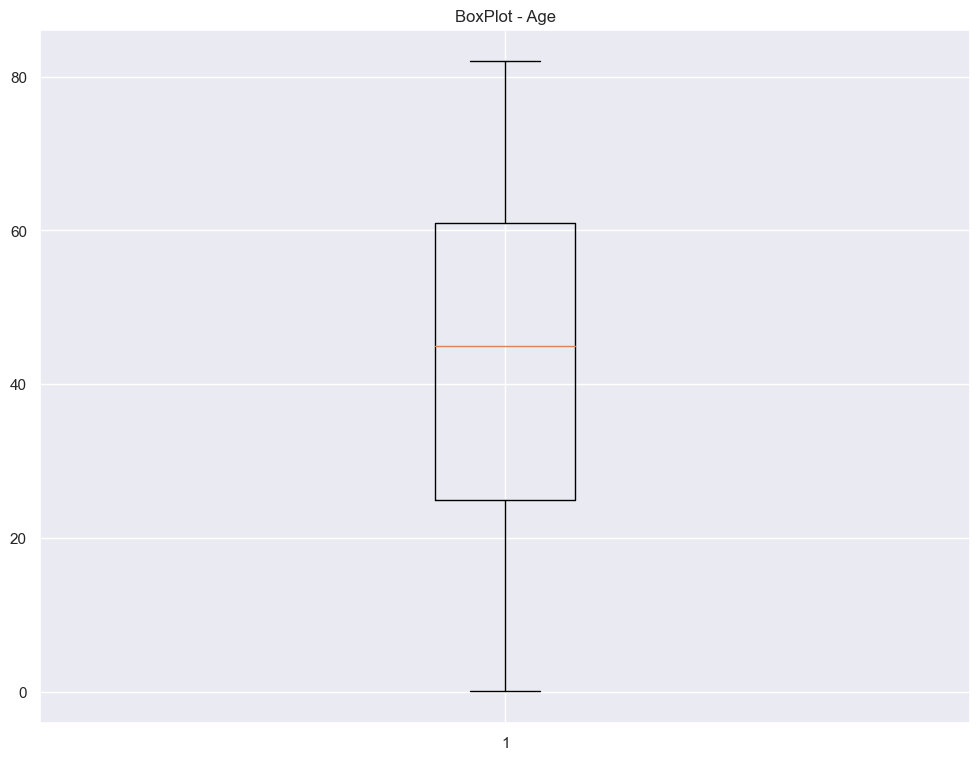

In [60]:
age_values=df.iloc[:]['age'].values
plt.boxplot(age_values)
plt.title('BoxPlot - Age')
plt.grid()
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot - Age')

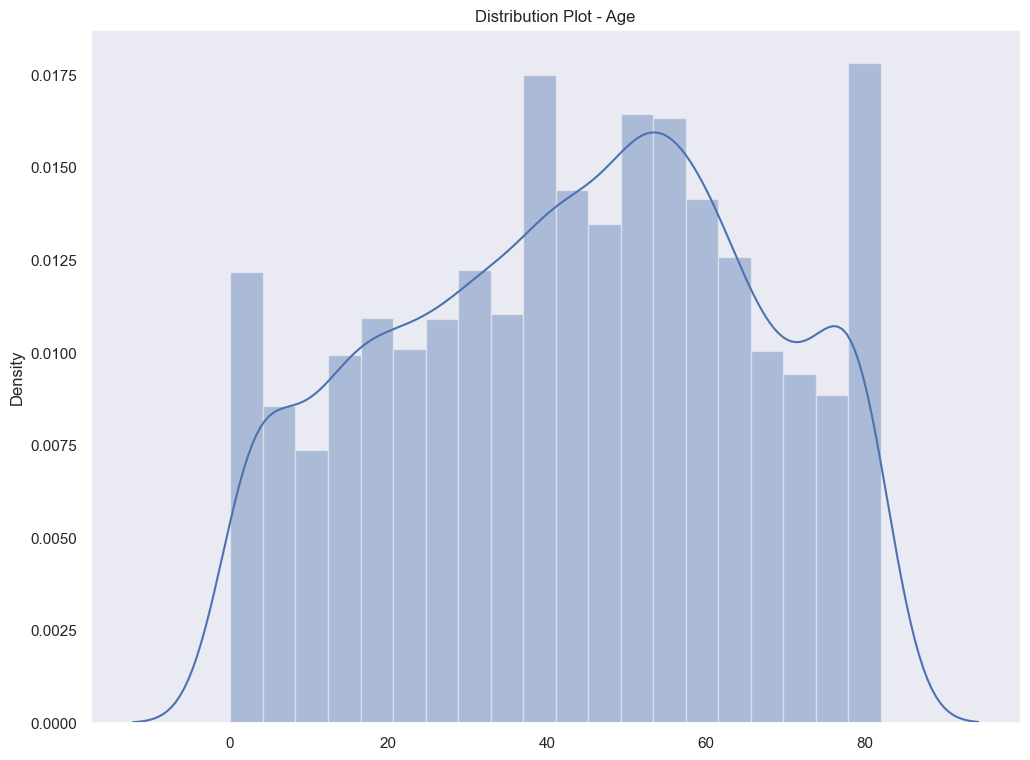

In [61]:
sns.distplot(x=age_values)
plt.title('Distribution Plot - Age')

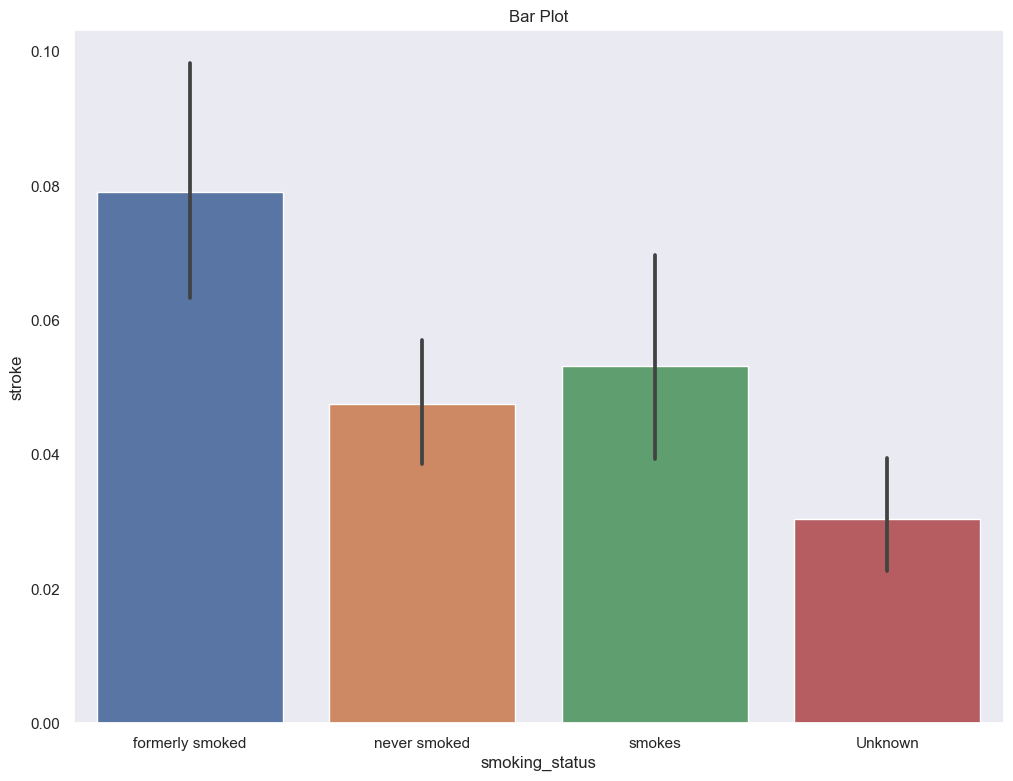

In [62]:
plt.rcParams['figure.figsize']=(12.0,9.0)
sns.barplot(x='smoking_status', y='stroke', data=df)
plt.title('Bar Plot')
plt.show()

<AxesSubplot:xlabel='id'>

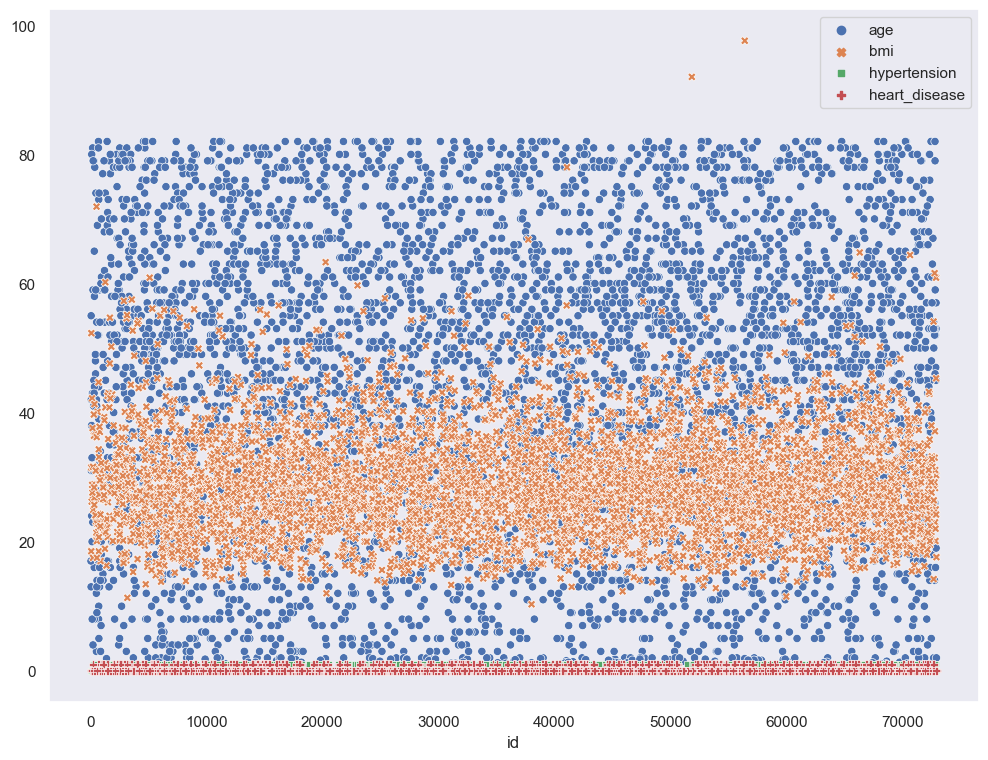

In [63]:
sns.scatterplot(data=df[['age','bmi','smoking_status','hypertension','heart_disease','Residence_type','work_type','gender']])

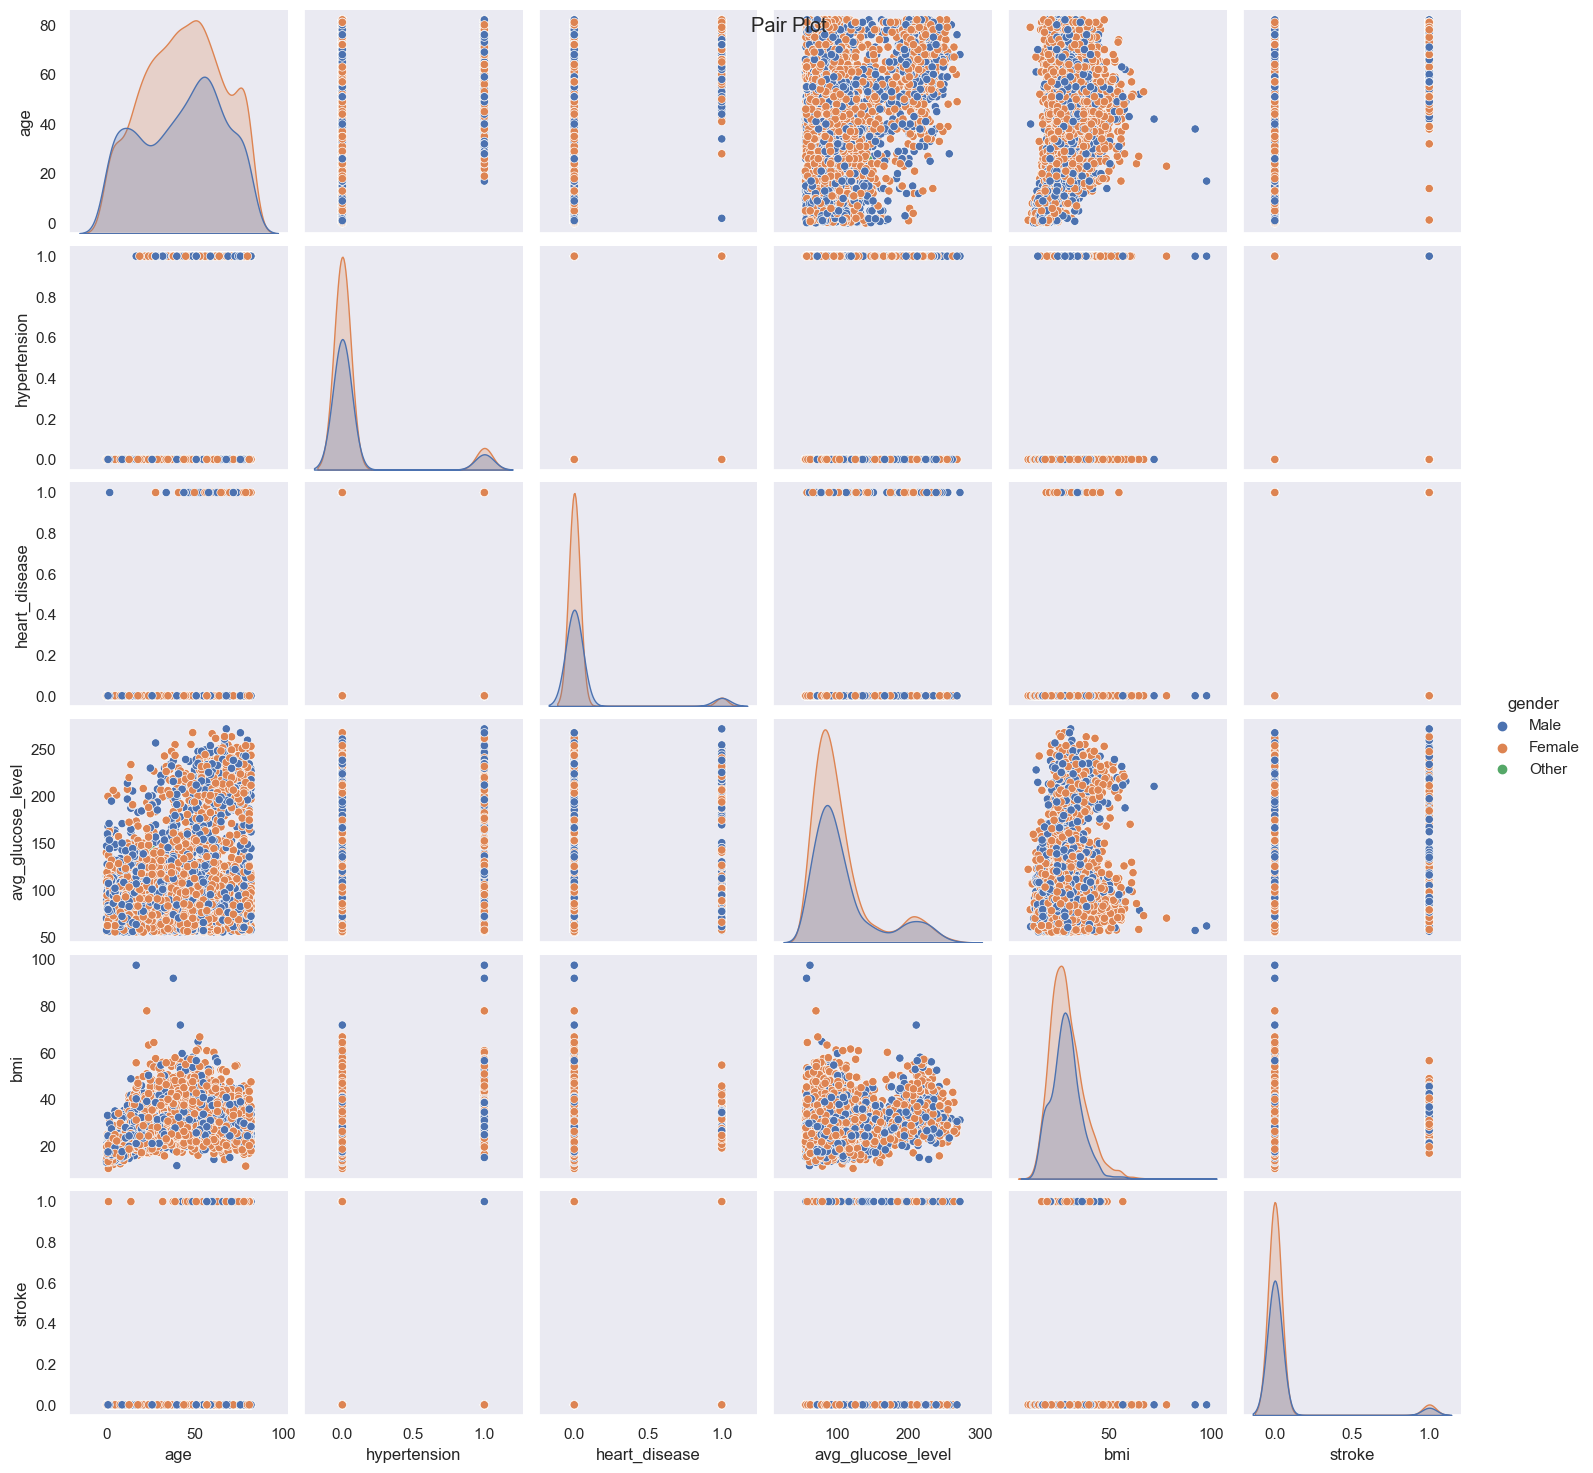

In [64]:
pp = sns.pairplot(data=df, hue='gender')
pp.fig.suptitle('Pair Plot')
plt.show()

<AxesSubplot:>

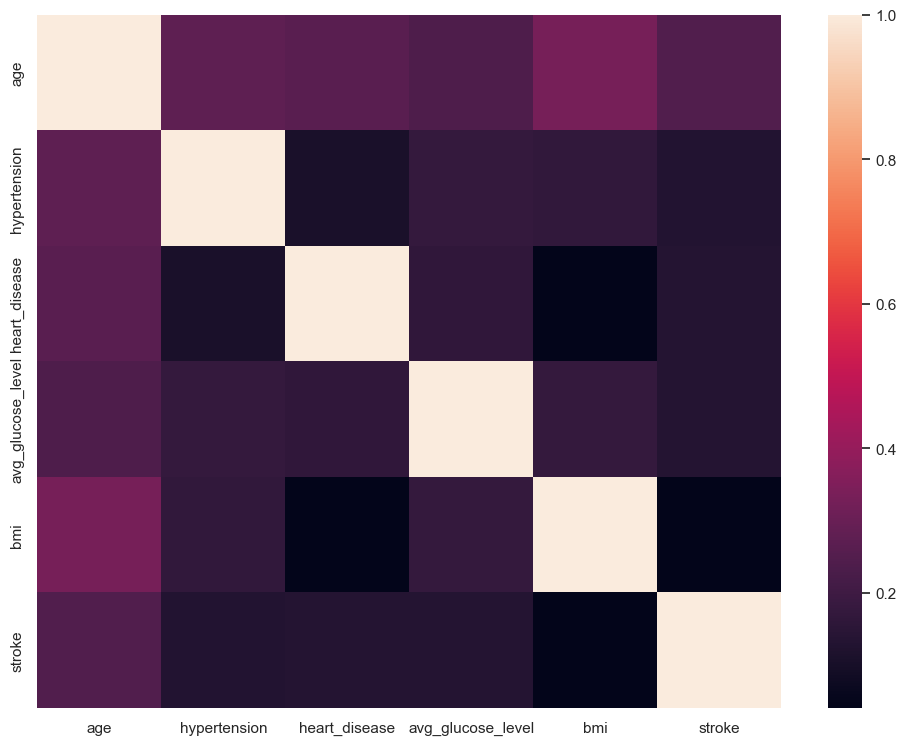

In [65]:
sns.heatmap(df.corr())

In [66]:
df.groupby(['stroke']).stroke.count()

stroke
0    4861
1     249
Name: stroke, dtype: int64

In [67]:
df.groupby(['smoking_status']).smoking_status.count()

smoking_status
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
Name: smoking_status, dtype: int64

In [68]:
df1

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-employed          Rural             202.21  28.893237   
2           Private          Rural             105.92  32.500000   
3           Private          Urban             171.23  34.400000   
4     Self-employed          Rural             174.12  24.000000   
...             ...            ...                ...        ...   
5105        Private          Urban              83.75  28.893237   
5106  Self-employed          Urban             125.20  40.000000   
5107  Self-employed          Rural              82.99  30.600000   
5108        Private          Rural             166.29  25.600000   
5109       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke  
0     formerly smoked       1  
1        never smoked       1  
2        never smoked       1  
3              smokes       1  
4        never smoked       1  
...               ...     ...  
5105     never smoked       0  
5106     never smoked       0  
5107     never smoked       0  
5108  formerly smoked       0  
5109          Unknown       0  

[5108 rows x 12 columns]

# ENCODING

In [69]:
# Categorical Columns: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

one_hot_encoder = OneHotEncoder()

df_temp = one_hot_encoder.fit_transform(df1[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]).toarray()


encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(),data = df_temp)
encodings = encodings.astype(int)
df1 = pd.concat([df1,encodings] , axis=1)


df1.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],axis = 1, inplace=True)
df1.head()

id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0   9046.0  67.0           0.0            1.0             228.69  36.600000   
1  51676.0  61.0           0.0            0.0             202.21  28.893237   
2  31112.0  80.0           0.0            1.0             105.92  32.500000   
3  60182.0  49.0           0.0            0.0             171.23  34.400000   
4   1665.0  79.0           1.0            0.0             174.12  24.000000   

   stroke  gender_Female  gender_Male  gender_Other  ...  \
0     1.0            0.0          1.0           0.0  ...   
1     1.0            1.0          0.0           0.0  ...   
2     1.0            0.0          1.0           0.0  ...   
3     1.0            1.0          0.0           0.0  ...   
4     1.0            1.0          0.0           0.0  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                     0.0                1.0                      0.0   
1                     0.0                0.0                      1.0   
2                     0.0                1.0                      0.0   
3                     0.0                1.0                      0.0   
4                     0.0                0.0                      1.0   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                 0.0                   0.0                   1.0   
1                 0.0                   1.0                   0.0   
2                 0.0                   1.0                   0.0   
3                 0.0                   0.0                   1.0   
4                 0.0                   1.0                   0.0   

   smoking_status_Unknown  smoking_status_formerly smoked  \
0                     0.0                             1.0   
1                     0.0                             0.0   
2                     0.0                             0.0   
3                     0.0                             0.0   
4                     0.0                             0.0   

   smoking_status_never smoked  smoking_status_smokes  
0                          0.0                    0.0  
1                          1.0                    0.0  
2                          1.0                    0.0  
3                          0.0                    1.0  
4                          1.0                    0.0  

[5 rows x 23 columns]

In [70]:
a = len(df1[df1['gender_Female'] == 1])
print("Number of Females:",a)

Number of Females: 2992


In [71]:
b = len(df1[df1['gender_Male'] == 1])
print("Number of Males:",b)

Number of Males: 2115


In [72]:
df1.isnull().sum()

id                                2
age                               2
hypertension                      2
heart_disease                     2
avg_glucose_level                 2
bmi                               2
stroke                            2
gender_Female                     2
gender_Male                       2
gender_Other                      2
ever_married_No                   2
ever_married_Yes                  2
work_type_Govt_job                2
work_type_Never_worked            2
work_type_Private                 2
work_type_Self-employed           2
work_type_children                2
Residence_type_Rural              2
Residence_type_Urban              2
smoking_status_Unknown            2
smoking_status_formerly smoked    2
smoking_status_never smoked       2
smoking_status_smokes             2
dtype: int64

In [73]:
df1=df1.dropna()

In [74]:
df1.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [75]:
df1.dtypes

id                                float64
age                               float64
hypertension                      float64
heart_disease                     float64
avg_glucose_level                 float64
bmi                               float64
stroke                            float64
gender_Female                     float64
gender_Male                       float64
gender_Other                      float64
ever_married_No                   float64
ever_married_Yes                  float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
Residence_type_Rural              float64
Residence_type_Urban              float64
smoking_status_Unknown            float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
dtype: object

In [76]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

0.0    4859
1.0     247
Name: stroke, dtype: int64


<AxesSubplot:>

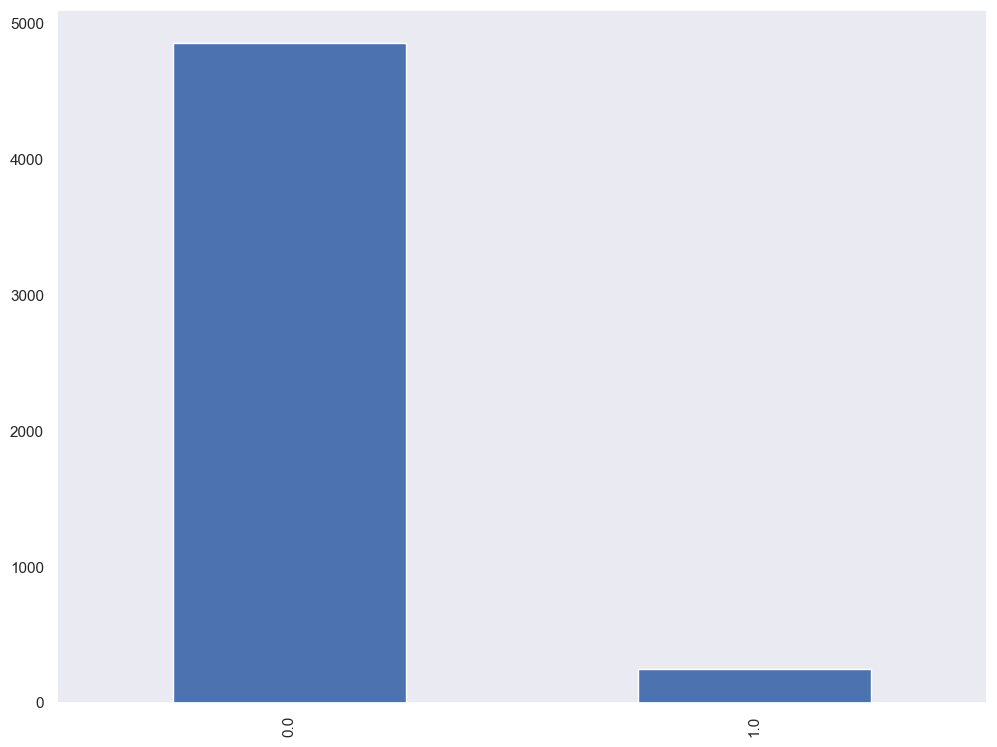

In [77]:
print(df1['stroke'].value_counts())
df1['stroke'].value_counts().sort_index().plot.bar()

In [78]:
oversample = RandomOverSampler(sampling_strategy='minority')
X=df1.drop(['stroke'],axis=1)
y=df1['stroke']
X_over, y_over = oversample.fit_resample(X, y)

In [79]:
# Apply oversampling
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X, y.ravel())

1.0    4859
0.0    4859
Name: stroke, dtype: int64


<AxesSubplot:>

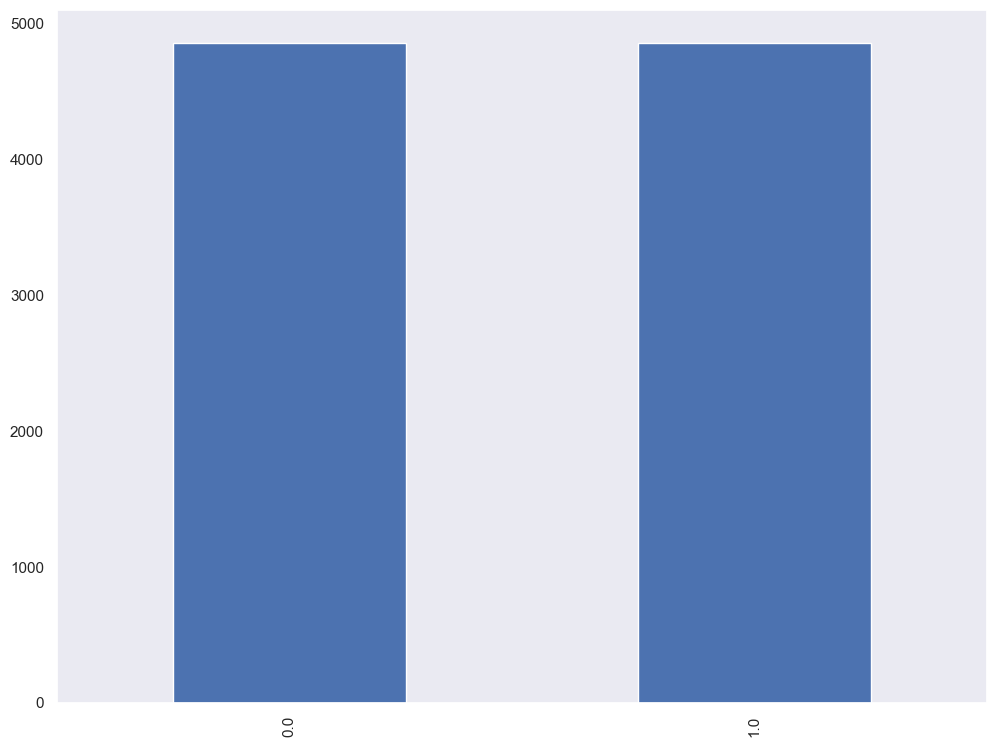

In [80]:
print(y_over.value_counts())
y_over.value_counts().sort_index().plot.bar()

# Base Model - 1

## LOGISTIC REGRESSION

In [81]:
X = df1.iloc[:,df1.columns != 'stroke']
y = df1.stroke

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [83]:
X_test

id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
4280  67711.0  18.0           0.0            0.0              88.85  36.2   
2461  20393.0  67.0           1.0            0.0              97.06  30.9   
4881   1731.0  80.0           0.0            0.0              72.71  29.9   
45    19824.0  76.0           1.0            0.0             243.58  33.6   
2992  52236.0  60.0           0.0            0.0             230.78  40.2   
...       ...   ...           ...            ...                ...   ...   
3227  14517.0  56.0           0.0            0.0              82.25  30.5   
3270  72082.0  45.0           0.0            0.0              69.76  25.3   
2112   9199.0  13.0           0.0            0.0              74.19  31.1   
821   25458.0  70.0           1.0            0.0              88.66  36.7   
4064  45622.0  25.0           0.0            0.0             118.85  23.8   

      gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
4280            1.0          0.0           0.0              0.0  ...   
2461            1.0          0.0           0.0              1.0  ...   
4881            1.0          0.0           0.0              0.0  ...   
45              0.0          1.0           0.0              0.0  ...   
2992            1.0          0.0           0.0              0.0  ...   
...             ...          ...           ...              ...  ...   
3227            1.0          0.0           0.0              1.0  ...   
3270            0.0          1.0           0.0              0.0  ...   
2112            1.0          0.0           0.0              0.0  ...   
821             0.0          1.0           0.0              0.0  ...   
4064            0.0          1.0           0.0              1.0  ...   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
4280                     0.0                1.0                      0.0   
2461                     0.0                1.0                      0.0   
4881                     0.0                1.0                      0.0   
45                       0.0                1.0                      0.0   
2992                     0.0                1.0                      0.0   
...                      ...                ...                      ...   
3227                     0.0                1.0                      0.0   
3270                     0.0                0.0                      0.0   
2112                     0.0                1.0                      0.0   
821                      0.0                0.0                      0.0   
4064                     0.0                0.0                      1.0   

      work_type_children  Residence_type_Rural  Residence_type_Urban  \
4280                 0.0                   0.0                   1.0   
2461                 0.0                   1.0                   0.0   
4881                 0.0                   0.0                   1.0   
45                   0.0                   1.0                   0.0   
2992                 0.0                   0.0                   1.0   
...                  ...                   ...                   ...   
3227                 0.0                   1.0                   0.0   
3270                 0.0                   1.0                   0.0   
2112                 0.0                   0.0                   1.0   
821                  0.0                   0.0                   1.0   
4064                 0.0                   0.0                   1.0   

      smoking_status_Unknown  smoking_status_formerly smoked  \
4280                     0.0                             1.0   
2461                     0.0                             0.0   
4881                     0.0                             0.0   
45                       0.0                             0.0   
2992                     0.0                             0.0   
...                      ...                             ..

In [84]:
LogisReg_model = LogisticRegression()
LogisReg_model.fit(X_train,y_train)
Log_y_preds = LogisReg_model.predict(X_test)
Log_preds = pd.DataFrame({"Predicted":Log_y_preds,"Actual":y_test})
Log_preds

Predicted  Actual
4280        0.0     0.0
2461        0.0     0.0
4881        0.0     0.0
45          0.0     1.0
2992        0.0     0.0
...         ...     ...
3227        0.0     0.0
3270        0.0     0.0
2112        0.0     0.0
821         0.0     0.0
4064        0.0     0.0

[1022 rows x 2 columns]

In [85]:
Log_TP = len(Log_preds[(Log_preds["Predicted"]==Log_preds["Actual"])&(Log_preds["Predicted"]==1)])
Log_FP = len(Log_preds[(Log_preds["Predicted"]!=Log_preds["Actual"])&(Log_preds["Predicted"]==1)])
Log_FN = len(Log_preds[(Log_preds["Predicted"]!=Log_preds["Actual"])&(Log_preds["Predicted"]==0)])
Log_TN = len(Log_preds[(Log_preds["Predicted"]==Log_preds["Actual"])&(Log_preds["Predicted"]==0)])
print(Log_TP,Log_FP,Log_FN,Log_TN)
print("Rightly Classified: ",(Log_TP+Log_TN),"/",(Log_TP+Log_FP+Log_FN+Log_TN))
print("Wrongly Classified: ",(Log_FP+Log_FN),"/",(Log_TP+Log_FP+Log_FN+Log_TN))

Log_Accuracy = (Log_TP+Log_TN)/(Log_TP+Log_TN+Log_FP+Log_FN)
Log_Precision = (Log_TP)/(Log_TP+Log_FP)
Log_Recall = (Log_TP)/(Log_TP+Log_FN)
Log_Specificity = (Log_TN)/(Log_TN+Log_FP)
Log_F1 = (2*Log_Precision*Log_Recall)/(Log_Precision+Log_Recall)

1 1 41 979
Rightly Classified:  980 / 1022
Wrongly Classified:  42 / 1022


In [86]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
LogisticRegression()
train_acc = model.score(X_train_scaled, y_train)

In [87]:
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 94.90695396669932


In [88]:
y_pred = model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 95.79256360078277


In [89]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       980
         1.0       0.33      0.02      0.04        42

    accuracy                           0.96      1022
   macro avg       0.65      0.51      0.51      1022
weighted avg       0.93      0.96      0.94      1022



Text(0.5, 33.249999999999986, 'Predicted Values')

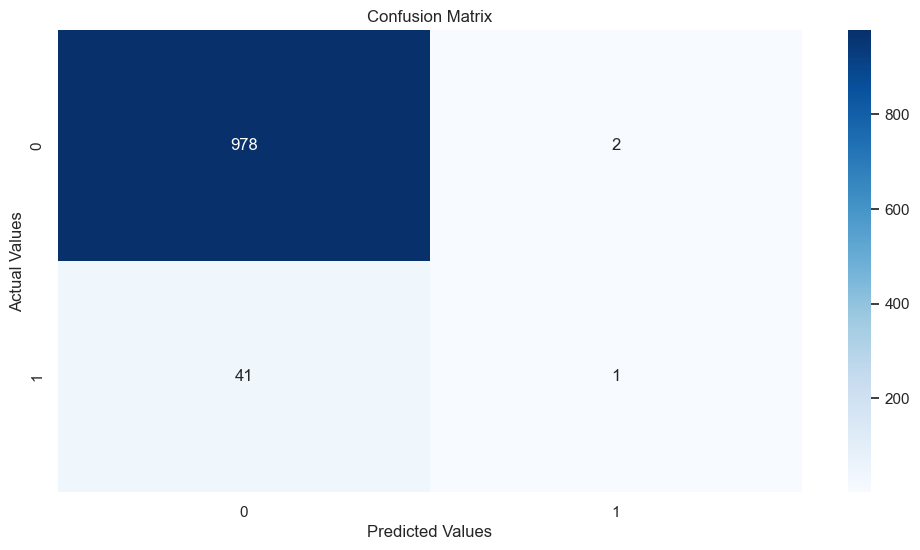

In [90]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [91]:
# plot_confusion_matrix(model, X_test, y_test)

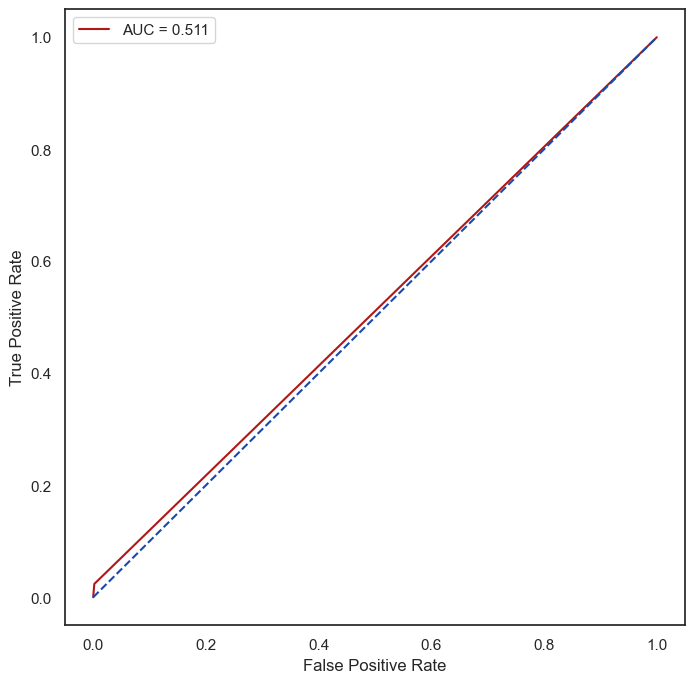

In [92]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# METRICS

In [93]:
Precision = metrics.precision_score(y_test, y_pred)
print(Precision)

0.3333333333333333


In [94]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(Sensitivity_recall)

0.023809523809523808


In [95]:
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
print(Specificity)

0.9979591836734694


In [96]:
F1_score = metrics.f1_score(y_test, y_pred)
print(F1_score)

0.044444444444444446


## ACCURACY

In [97]:
acc_lr = accuracy_score(y_test, y_pred)
print ("Accuracy : ", acc_lr)

Accuracy :  0.9579256360078278


# BASE MODEL - 2

## DECISION TREE

In [98]:
df3 = df1.drop(['id'], axis=1)

In [99]:
df3.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [100]:
column = df3.columns

In [101]:
X = df3.iloc[:,df3.columns != 'stroke']
y = df3.stroke

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

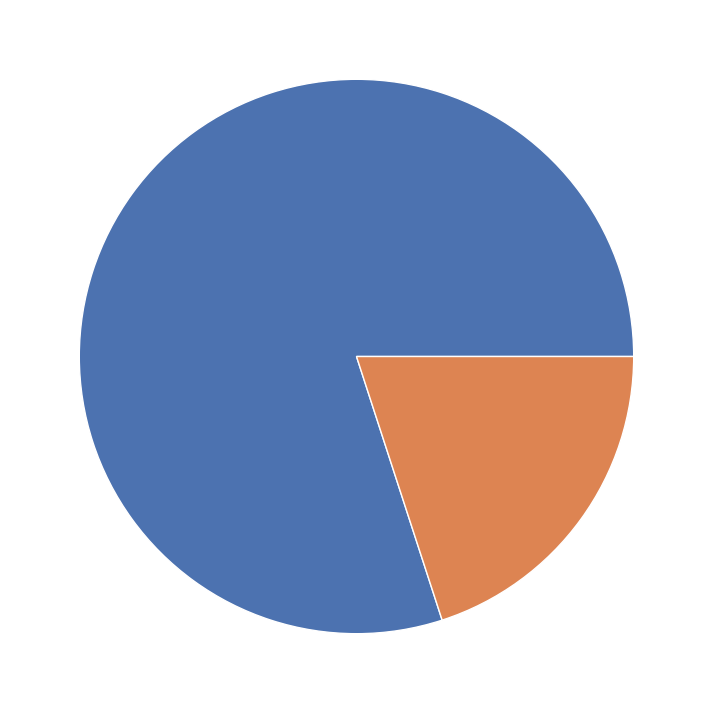

In [103]:
Split=np.array([80,20])
plt.pie(Split)
plt.show() 

In [104]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [105]:
y_pred = classifier.predict(X_test)

In [106]:
DecisionTree_model = tree.DecisionTreeClassifier(criterion="entropy")
DecisionTree_model.fit(X_train,y_train)
y_preds = DecisionTree_model.predict(X_test)
Decision_tree_preds = pd.DataFrame({"Predicted":y_preds,"Actual":y_test})
Decision_tree_preds

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [107]:
Decision_TP = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]==Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==1)])
Decision_FP = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]!=Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==1)])
Decision_FN = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]!=Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==0)])
Decision_TN = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]==Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==0)])
print(Decision_TP,Decision_FP,Decision_FN,Decision_TN)
print("Rightly Classified: ",(Decision_TP+Decision_TN),"/",(Decision_TP+Decision_FP+Decision_FN+Decision_TN))
print("Wrongly Classified: ",(Decision_FP+Decision_FN),"/",(Decision_TP+Decision_FP+Decision_FN+Decision_TN))

Decision_Accuracy = (Decision_TP+Decision_TN)/(Decision_TP+Decision_TN+Decision_FP+Decision_FN)
Decision_Precision = (Decision_TP)/(Decision_TP+Decision_FP)
Decision_Recall = (Decision_TP)/(Decision_TP+Decision_FN)
Decision_Specificity = (Decision_TN)/(Decision_TN+Decision_FP)
Decision_F1 = (2*Decision_Precision*Decision_Recall)/(Decision_Precision+Decision_Recall)

7 43 47 925
Rightly Classified:  932 / 1022
Wrongly Classified:  90 / 1022


CONFUSION MATRIX

In [108]:
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[923  45]
 [ 47   7]]


ACCURACY

In [109]:
acc_dt=accuracy_score(y_test, y_pred)
print('Accuracy of the model:',acc_dt)

Accuracy of the model: 0.9099804305283757


PREDICTED VALUES

In [110]:
y_pred = classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [111]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

Actual  Predicted
42       1.0        0.0
3777     0.0        0.0
3792     0.0        0.0
3957     0.0        0.0
4626     0.0        0.0
...      ...        ...
3272     0.0        0.0
4201     0.0        0.0
248      1.0        0.0
4646     0.0        0.0
4920     0.0        0.0

[1022 rows x 2 columns]

[Text(0.39234484777517564, 0.9772727272727273, 'age <= 56.5\nentropy = 0.275\nsamples = 4084\nvalue = [3891, 193]\nclass = 0'),
 Text(0.0469847775175644, 0.9318181818181818, 'age <= 37.5\nentropy = 0.088\nsamples = 2799\nvalue = [2768, 31]\nclass = 0'),
 Text(0.00936768149882904, 0.8863636363636364, 'age <= 31.5\nentropy = 0.007\nsamples = 1638\nvalue = [1637, 1]\nclass = 0'),
 Text(0.00468384074941452, 0.8409090909090909, 'entropy = 0.0\nsamples = 1324\nvalue = [1324, 0]\nclass = 0'),
 Text(0.01405152224824356, 0.8409090909090909, 'age <= 32.5\nentropy = 0.031\nsamples = 314\nvalue = [313, 1]\nclass = 0'),
 Text(0.00936768149882904, 0.7954545454545454, 'Residence_type_Urban <= 0.5\nentropy = 0.127\nsamples = 57\nvalue = [56, 1]\nclass = 0'),
 Text(0.00468384074941452, 0.75, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = 0'),
 Text(0.01405152224824356, 0.75, 'avg_glucose_level <= 76.9\nentropy = 0.323\nsamples = 17\nvalue = [16, 1]\nclass = 0'),
 Text(0.00936768149882904, 0.704

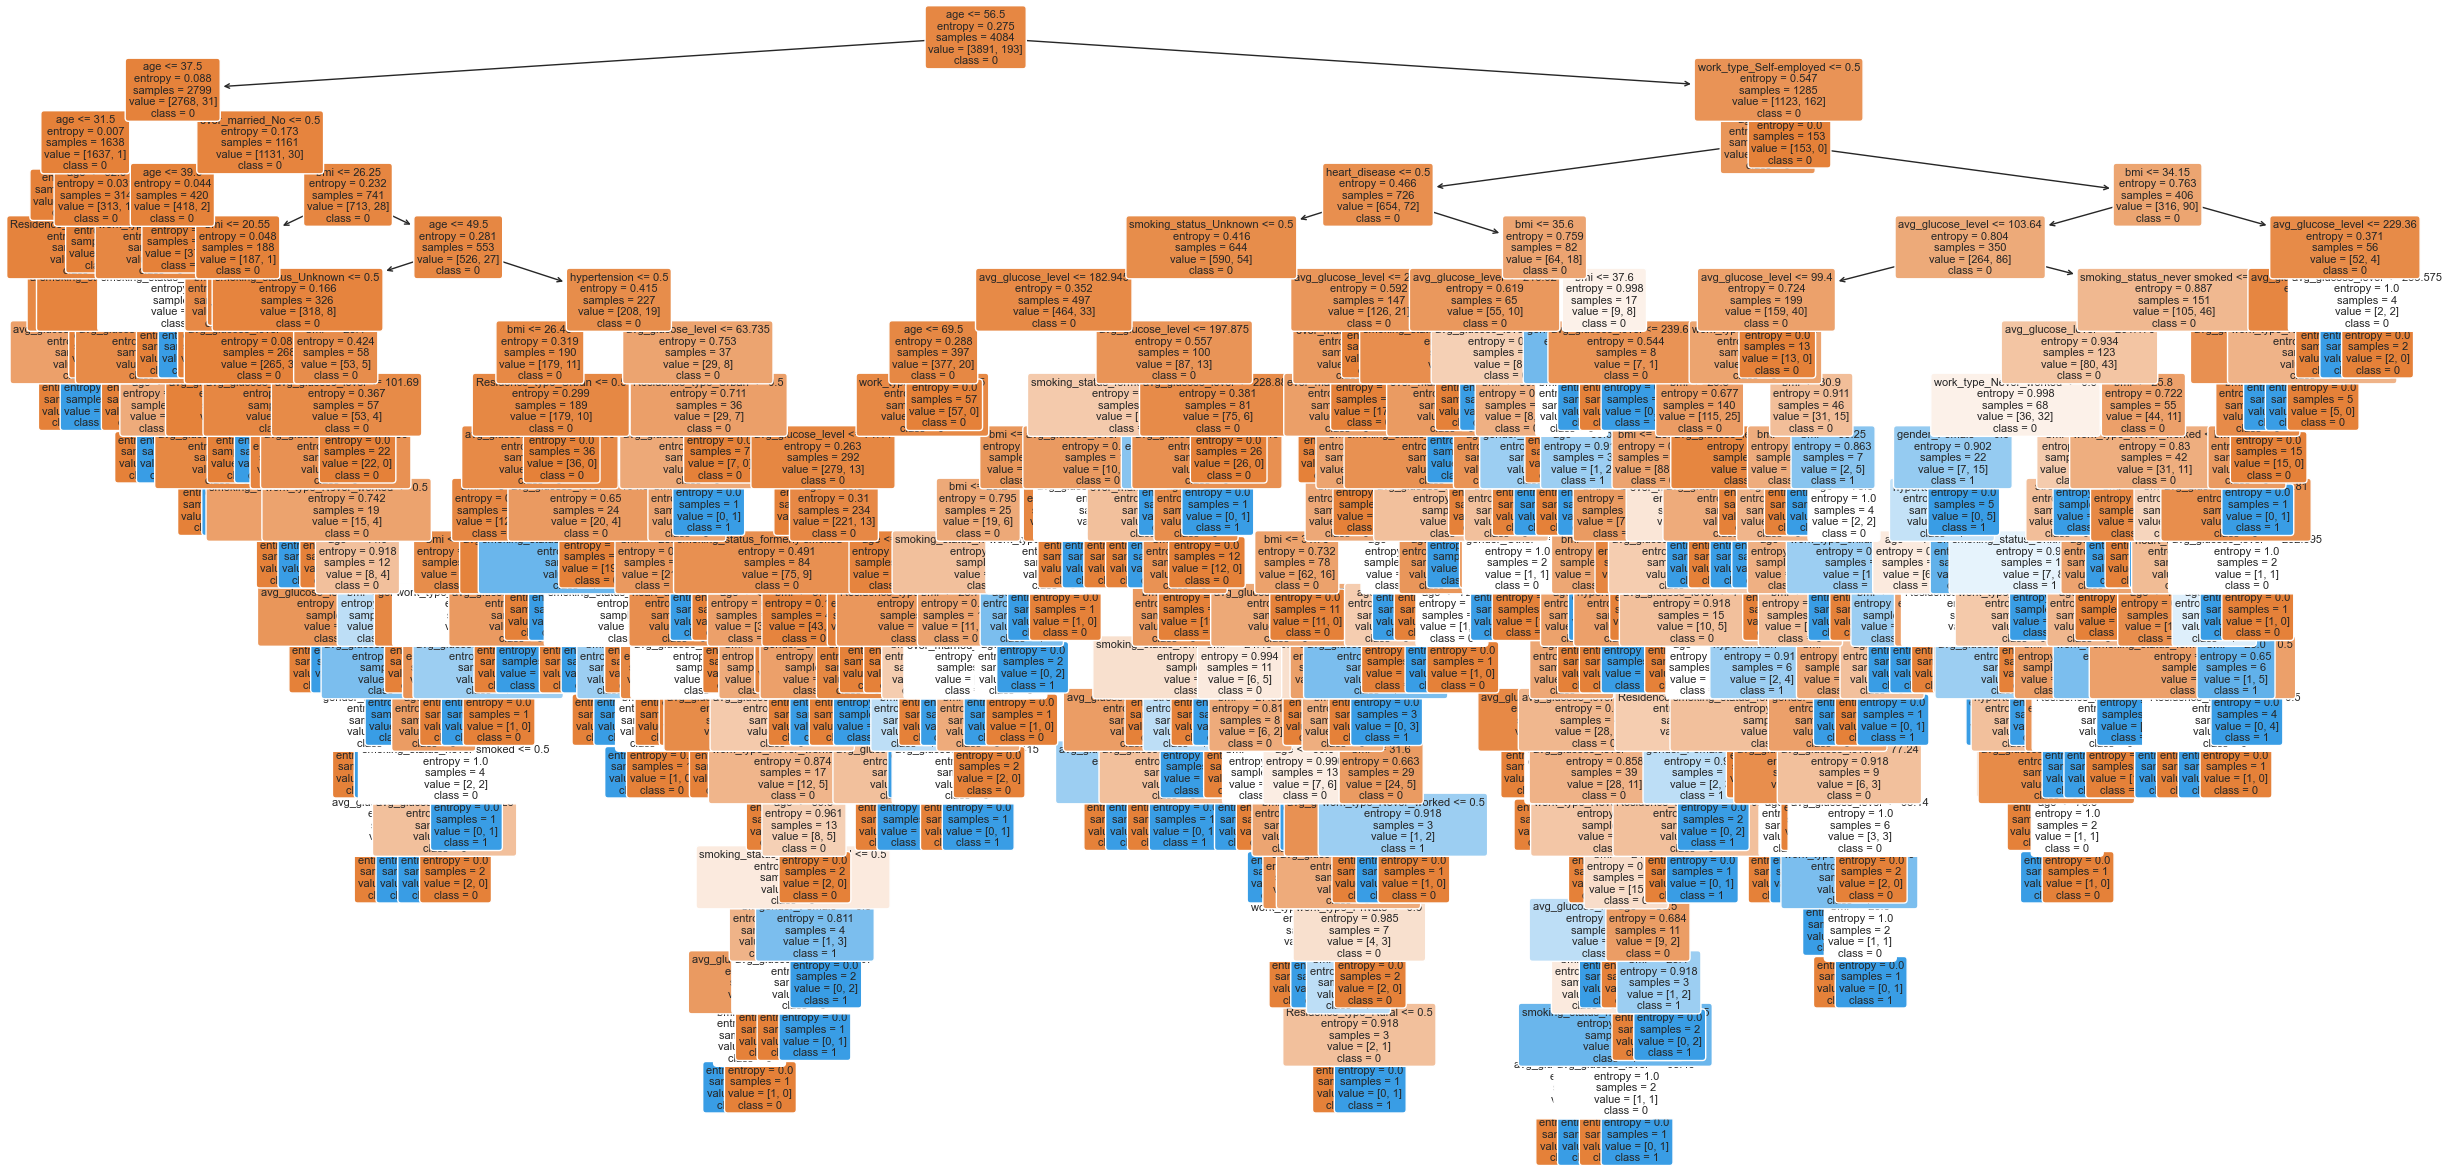

In [112]:
plt.figure(figsize=(30,15))
tree.plot_tree(classifier,class_names=['0','1'],feature_names=column, filled=True,rounded=True,fontsize=8)

PREDICTING FOR NEW RANDOM VALUES

In [113]:
Status=classifier.predict([[30,	1, 0, 86.6, 36.3, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]])
if Status==0:
  print('No Stroke')
else:
  print('Got Stroke')

No Stroke


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# LGBM (Light Gradient Boosting Machine) Classifier

In [114]:
from lightgbm import *

LGBM_model = LGBMClassifier()
LGBM_model.fit(X_train, y_train)
LGBM_y_preds = LGBM_model.predict(X_test)
LGBM_preds = pd.DataFrame({"Predicted":LGBM_y_preds,"Actual":y_test})
LGBM_preds

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 193, number of negative: 3891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 4084, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.047258 -> initscore=-3.003731
[LightGBM] [Info] Start training from score -3.003731


Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [115]:
LGBM_TP = len(LGBM_preds[(LGBM_preds["Predicted"]==LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==1)])
LGBM_FP = len(LGBM_preds[(LGBM_preds["Predicted"]!=LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==1)])
LGBM_FN = len(LGBM_preds[(LGBM_preds["Predicted"]!=LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==0)])
LGBM_TN = len(LGBM_preds[(LGBM_preds["Predicted"]==LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==0)])
print(LGBM_TP,LGBM_FP,LGBM_FN,LGBM_TN)
print("Rightly Classified: ",(LGBM_TP+LGBM_TN),"/",(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN))
print("Wrongly Classified: ",(LGBM_FP+LGBM_FN),"/",(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN))

LGBM_Accuracy = (LGBM_TP+LGBM_TN)/(LGBM_TP+LGBM_TN+LGBM_FP+LGBM_FN)
LGBM_Precision = (LGBM_TP)/(LGBM_TP+LGBM_FP)
LGBM_Recall = (LGBM_TP)/(LGBM_TP+LGBM_FN)
LGBM_Specificity = (LGBM_TN)/(LGBM_TN+LGBM_FP)
LGBM_F1 = (2*LGBM_Precision*LGBM_Recall)/(LGBM_Precision+LGBM_Recall)

1 4 53 964
Rightly Classified:  965 / 1022
Wrongly Classified:  57 / 1022


<AxesSubplot:>

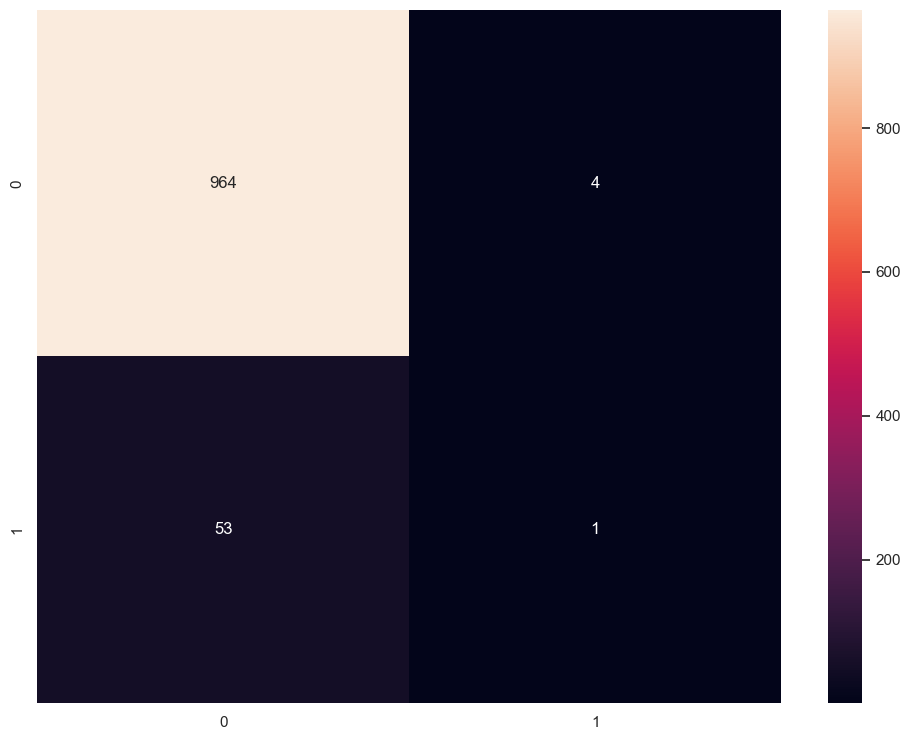

In [116]:
LGBM_Confusion_matrix = confusion_matrix(y_test, LGBM_y_preds)
sns.heatmap(LGBM_Confusion_matrix, annot=True, fmt='g')

In [117]:
print(classification_report(y_test, LGBM_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.20      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.91      0.94      0.92      1022



# CatBoost Classifier (300 and 1000 iterations)

In [118]:
!pip install catboost

In [119]:
from catboost import CatBoostClassifier

CatBoost_model = CatBoostClassifier()
CatBoost_model.fit(X_train, y_train)
CatBoost_y_preds = CatBoost_model.predict(X_test)
CatBoost_preds = pd.DataFrame({"Predicted":CatBoost_y_preds,"Actual":y_test})
CatBoost_preds

Learning rate set to 0.018787
0:	learn: 0.6603011	total: 166ms	remaining: 2m 45s
1:	learn: 0.6281853	total: 175ms	remaining: 1m 27s
2:	learn: 0.6035521	total: 186ms	remaining: 1m 1s
3:	learn: 0.5777677	total: 197ms	remaining: 49s
4:	learn: 0.5553177	total: 207ms	remaining: 41.2s
5:	learn: 0.5347505	total: 215ms	remaining: 35.7s
6:	learn: 0.5106868	total: 224ms	remaining: 31.7s
7:	learn: 0.4897161	total: 230ms	remaining: 28.5s
8:	learn: 0.4736218	total: 234ms	remaining: 25.8s
9:	learn: 0.4586903	total: 245ms	remaining: 24.2s
10:	learn: 0.4393174	total: 253ms	remaining: 22.8s
11:	learn: 0.4258259	total: 263ms	remaining: 21.7s
12:	learn: 0.4128680	total: 273ms	remaining: 20.7s
13:	learn: 0.3988277	total: 282ms	remaining: 19.9s
14:	learn: 0.3866127	total: 292ms	remaining: 19.2s
15:	learn: 0.3730059	total: 302ms	remaining: 18.6s
16:	learn: 0.3628257	total: 311ms	remaining: 18s
17:	learn: 0.3496364	total: 321ms	remaining: 17.5s
18:	learn: 0.3401539	total: 330ms	remaining: 17.1s
19:	learn: 0.

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [120]:
CatBoost_model2 = CatBoostClassifier(iterations=300,silent=True)
CatBoost_model2.fit(X_train, y_train)
CatBoost_y_preds2 = CatBoost_model2.predict(X_test)
CatBoost_preds2 = pd.DataFrame({"Predicted":CatBoost_y_preds2,"Actual":y_test})
CatBoost_preds2

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [121]:
#1000 iterations
CatBoost_TP = len(CatBoost_preds[(CatBoost_preds["Predicted"]==CatBoost_preds["Actual"])&(CatBoost_preds["Predicted"]==1)])
CatBoost_FP = len(CatBoost_preds[(CatBoost_preds["Predicted"]!=CatBoost_preds["Actual"])&(CatBoost_preds["Predicted"]==1)])
CatBoost_FN = len(CatBoost_preds[(CatBoost_preds["Predicted"]!=CatBoost_preds["Actual"])&(CatBoost_preds["Predicted"]==0)])
CatBoost_TN = len(CatBoost_preds[(CatBoost_preds["Predicted"]==CatBoost_preds["Actual"])&(CatBoost_preds["Predicted"]==0)])
print(CatBoost_TP,CatBoost_FP,CatBoost_FN,CatBoost_TN)
print("Rightly Classified: ",(CatBoost_TP+CatBoost_TN),"/",(CatBoost_TP+CatBoost_FP+CatBoost_FN+CatBoost_TN))
print("Wrongly Classified: ",(CatBoost_FP+CatBoost_FN),"/",(CatBoost_TP+CatBoost_FP+CatBoost_FN+CatBoost_TN))

CatBoost_Accuracy = (CatBoost_TP+CatBoost_TN)/(CatBoost_TP+CatBoost_TN+CatBoost_FP+CatBoost_FN)
CatBoost_Precision = (CatBoost_TP)/(CatBoost_TP+CatBoost_FP)
CatBoost_Recall = (CatBoost_TP)/(CatBoost_TP+CatBoost_FN)
CatBoost_Specificity = (CatBoost_TN)/(CatBoost_TN+CatBoost_FP)
CatBoost_F1 = (2*CatBoost_Precision*CatBoost_Recall)/(CatBoost_Precision+CatBoost_Recall)

2 5 52 963
Rightly Classified:  965 / 1022
Wrongly Classified:  57 / 1022


In [122]:
#300 iterations
CatBoost_TP2 = len(CatBoost_preds2[(CatBoost_preds2["Predicted"]==CatBoost_preds2["Actual"])&(CatBoost_preds2["Predicted"]==1)])
CatBoost_FP2 = len(CatBoost_preds2[(CatBoost_preds2["Predicted"]!=CatBoost_preds2["Actual"])&(CatBoost_preds2["Predicted"]==1)])
CatBoost_FN2 = len(CatBoost_preds2[(CatBoost_preds2["Predicted"]!=CatBoost_preds2["Actual"])&(CatBoost_preds2["Predicted"]==0)])
CatBoost_TN2 = len(CatBoost_preds2[(CatBoost_preds2["Predicted"]==CatBoost_preds2["Actual"])&(CatBoost_preds2["Predicted"]==0)])
print(CatBoost_TP2,CatBoost_FP2,CatBoost_FN2,CatBoost_TN2)
print("Rightly Classified: ",(CatBoost_TP2+CatBoost_TN2),"/",(CatBoost_TP2+CatBoost_FP2+CatBoost_FN2+CatBoost_TN2))
print("Wrongly Classified: ",(CatBoost_FP2+CatBoost_FN2),"/",(CatBoost_TP2+CatBoost_FP2+CatBoost_FN2+CatBoost_TN2))

CatBoost_Accuracy2 = (CatBoost_TP2+CatBoost_TN2)/(CatBoost_TP2+CatBoost_TN2+CatBoost_FP2+CatBoost_FN2)
CatBoost_Precision2 = (CatBoost_TP2)/(CatBoost_TP2+CatBoost_FP2)
CatBoost_Recall2 = (CatBoost_TP2)/(CatBoost_TP2+CatBoost_FN2)
CatBoost_Specificity2 = (CatBoost_TN2)/(CatBoost_TN2+CatBoost_FP2)
CatBoost_F12 = (2*CatBoost_Precision2*CatBoost_Recall2)/(CatBoost_Precision2+CatBoost_Recall2)

2 3 52 965
Rightly Classified:  967 / 1022
Wrongly Classified:  55 / 1022


<AxesSubplot:>

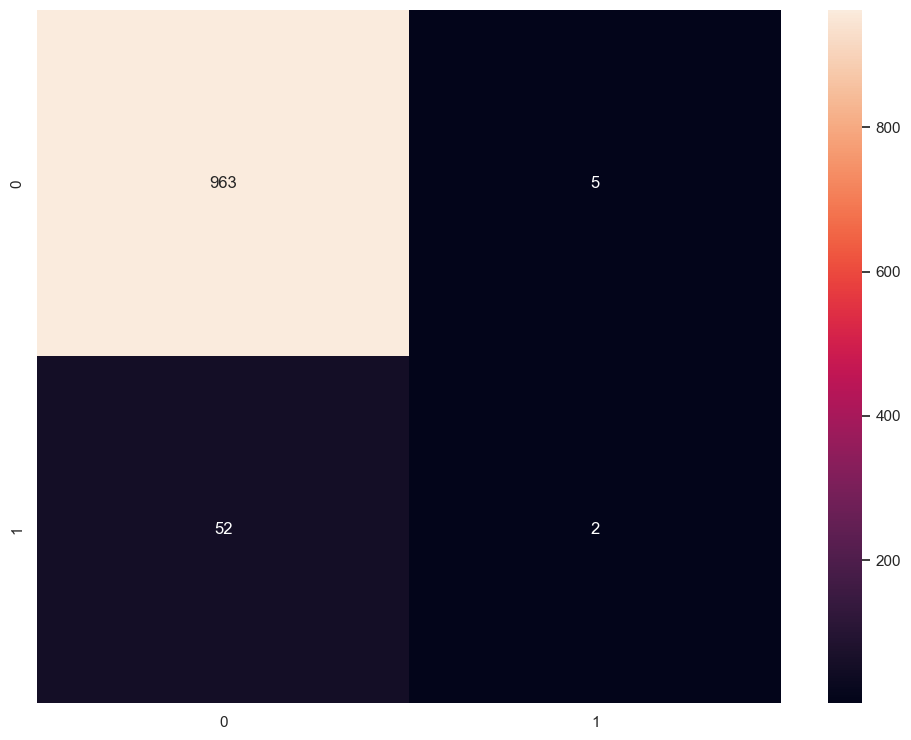

In [123]:
#1000 Iterations
CatBoost_Confusion_matrix = confusion_matrix(y_test, CatBoost_y_preds)
sns.heatmap(CatBoost_Confusion_matrix, annot=True, fmt='g')

<AxesSubplot:>

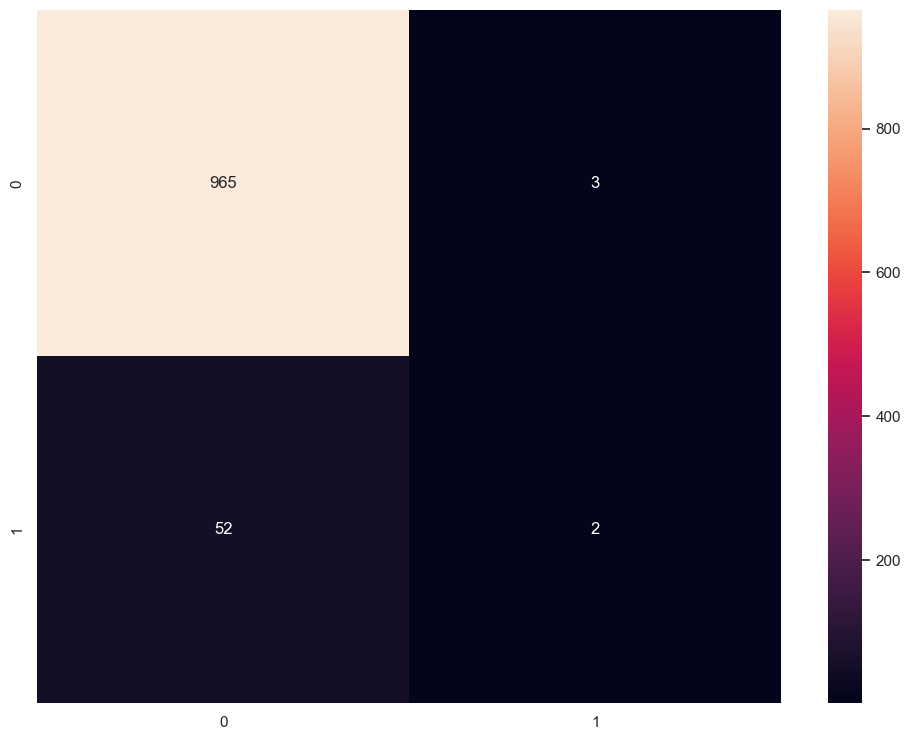

In [124]:
#300 Iterations
CatBoost_Confusion_matrix2 = confusion_matrix(y_test, CatBoost_y_preds2)
sns.heatmap(CatBoost_Confusion_matrix2, annot=True, fmt='g')

In [125]:
#1000 Iterations
print(classification_report(y_test, CatBoost_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       968
         1.0       0.29      0.04      0.07        54

    accuracy                           0.94      1022
   macro avg       0.62      0.52      0.52      1022
weighted avg       0.91      0.94      0.92      1022



In [126]:
#300 Iterations
print(classification_report(y_test, CatBoost_y_preds2))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.40      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.67      0.52      0.52      1022
weighted avg       0.92      0.95      0.92      1022



# XGBoosting

In [127]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)
XGB_y_preds =XGB_model.predict(X_test)
XGB_preds = pd.DataFrame({"Predicted":XGB_y_preds,"Actual":y_test})
XGB_preds

Predicted  Actual
42            0     1.0
3777          0     0.0
3792          0     0.0
3957          0     0.0
4626          0     0.0
...         ...     ...
3272          0     0.0
4201          0     0.0
248           0     1.0
4646          0     0.0
4920          0     0.0

[1022 rows x 2 columns]

In [128]:
XGB_TP = len(XGB_preds[(XGB_preds["Predicted"]==XGB_preds["Actual"])&(XGB_preds["Predicted"]==1)])
XGB_FP = len(XGB_preds[(XGB_preds["Predicted"]!=XGB_preds["Actual"])&(XGB_preds["Predicted"]==1)])
XGB_FN = len(XGB_preds[(XGB_preds["Predicted"]!=XGB_preds["Actual"])&(XGB_preds["Predicted"]==0)])
XGB_TN = len(XGB_preds[(XGB_preds["Predicted"]==XGB_preds["Actual"])&(XGB_preds["Predicted"]==0)])
print(XGB_TP,XGB_FP,XGB_FN,XGB_TN)
print("Rightly Classified: ",(XGB_TP+XGB_TN),"/",(XGB_TP+XGB_FP+XGB_FN+XGB_TN))
print("Wrongly Classified: ",(XGB_FP+XGB_FN),"/",(XGB_TP+XGB_FP+XGB_FN+XGB_TN))

XGB_Accuracy = (XGB_TP+XGB_TN)/(XGB_TP+XGB_TN+XGB_FP+XGB_FN)
# XGB_Precision = (XGB_TP)/(XGB_TP+XGB_FP)
XGB_Recall = (XGB_TP)/(XGB_TP+XGB_FN)
XGB_Specificity = (XGB_TN)/(XGB_TN+XGB_FP)
# XGB_F1 = (2*XGB_Precision*XGB_Recall)/(XGB_Precision+XGB_Recall)

2 8 52 960
Rightly Classified:  962 / 1022
Wrongly Classified:  60 / 1022


<AxesSubplot:>

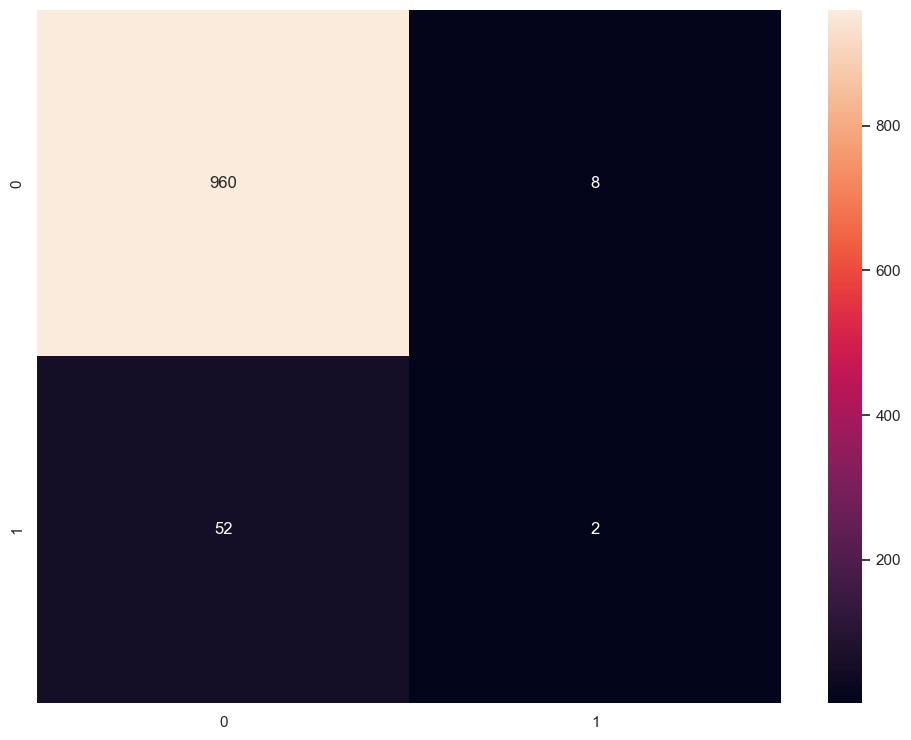

In [129]:
XGB_Confusion_matrix = confusion_matrix(y_test, XGB_y_preds)
sns.heatmap(XGB_Confusion_matrix, annot=True, fmt='g')

In [130]:
print(classification_report(y_test, XGB_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       968
         1.0       0.20      0.04      0.06        54

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.52      1022
weighted avg       0.91      0.94      0.92      1022



# Random Forest (Max 2 features in Bootstraping)

In [131]:
from sklearn.ensemble import RandomForestClassifier
RF_model1 = RandomForestClassifier(max_features=2)
RF_model1.fit(X_train,y_train)
RF_y_preds = RF_model1.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":y_test})
RF_preds

Predicted  Actual
42          1.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [132]:
import math

RF_TP1 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP1 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN1 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN1 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP1,RF_FP1,RF_FN1,RF_TN1)
print("Rightly Classified: ",(RF_TP1+RF_TN1),"/",(RF_TP1+RF_FP1+RF_FN1+RF_TN1))
print("Wrongly Classified: ",(RF_FP1+RF_FN1),"/",(RF_TP1+RF_FP1+RF_FN1+RF_TN1))

RF_Accuracy1 = (RF_TP1+RF_TN1)/(RF_TP1+RF_FP1+RF_FN1+RF_TN1)
RF_Precision1 = (RF_TP1)/(RF_TP1+RF_FP1)
RF_Recall1 = (RF_TP1)/(RF_TP1+RF_FN1)
RF_Specificity1 = (RF_TN1)/(RF_TN1+RF_FP1)
RF_F11 = (2*RF_Precision1*RF_Recall1)/(RF_Precision1+RF_Recall1)

2 3 52 965
Rightly Classified:  967 / 1022
Wrongly Classified:  55 / 1022


<AxesSubplot:>

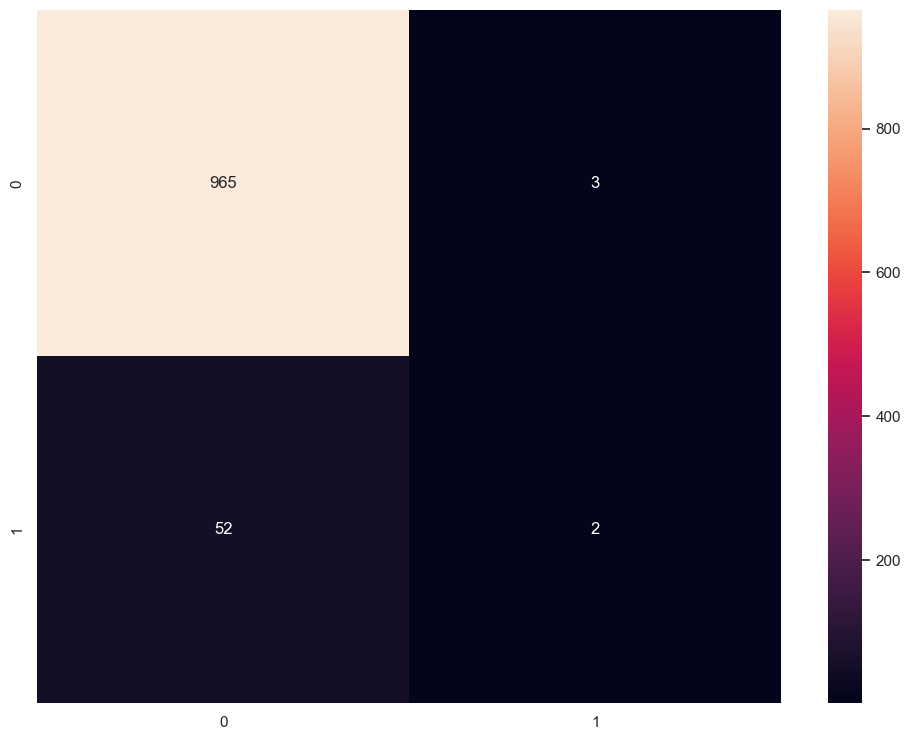

In [133]:
RF_Confusion_matrix = confusion_matrix(y_test, RF_y_preds)
sns.heatmap(RF_Confusion_matrix, annot=True, fmt='g')

In [134]:
print(classification_report(y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.40      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.67      0.52      0.52      1022
weighted avg       0.92      0.95      0.92      1022



# Random Forest (Max 5 features in Bootstraping)

In [135]:
RF_model2 = RandomForestClassifier(max_features=5)
RF_model2.fit(X_train,y_train)
RF_y_preds = RF_model2.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":y_test})
RF_preds

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [136]:
import math

RF_TP2 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP2 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN2 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN2 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP2,RF_FP2,RF_FN2,RF_TN2)
print("Rightly Classified: ",(RF_TP2+RF_TN2),"/",(RF_TP2+RF_FP2+RF_FN2+RF_TN2))
print("Wrongly Classified: ",(RF_FP2+RF_FN2),"/",(RF_TP2+RF_FP2+RF_FN2+RF_TN2))

RF_Accuracy2 = (RF_TP2+RF_TN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2)
RF_Precision2 = (RF_TP2)/(RF_TP2+RF_FP2)
RF_Recall2 = (RF_TP2)/(RF_TP2+RF_FN2)
RF_Specificity2 = (RF_TN2)/(RF_TN2+RF_FP2)
RF_F12 = (2*RF_Precision2*RF_Recall2)/(RF_Precision2+RF_Recall2)

1 4 53 964
Rightly Classified:  965 / 1022
Wrongly Classified:  57 / 1022


<AxesSubplot:>

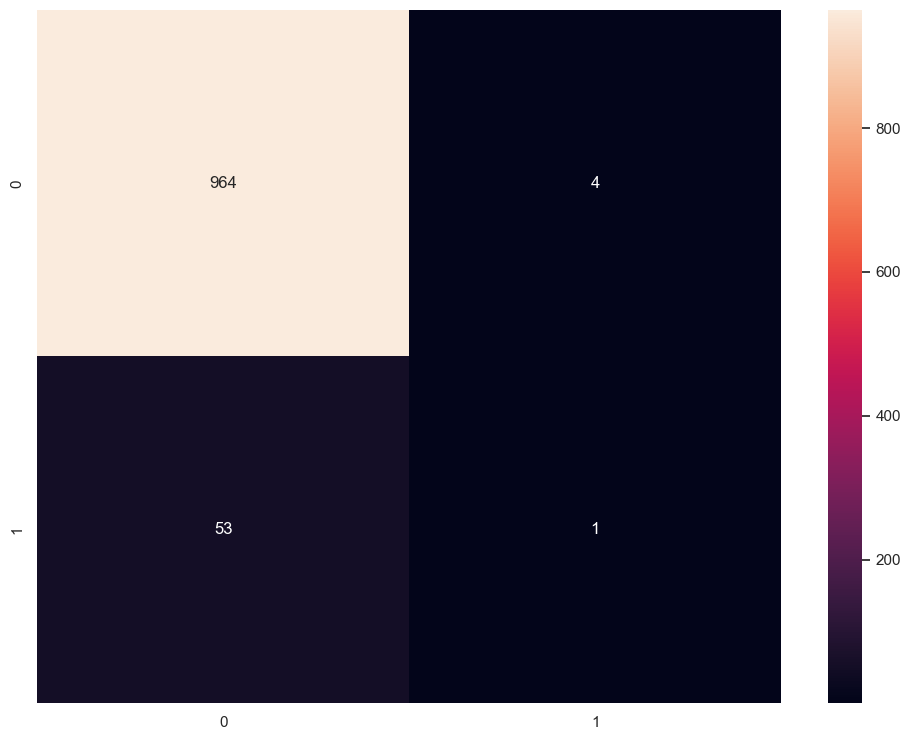

In [137]:
RF_Confusion_matrix = confusion_matrix(y_test, RF_y_preds)
sns.heatmap(RF_Confusion_matrix, annot=True, fmt='g')

In [138]:
print(classification_report(y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.20      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.91      0.94      0.92      1022



# Random Forest (Max 10 features in Bootstraping)

In [139]:
RF_model3 = RandomForestClassifier(max_features=10)
RF_model3.fit(X_train,y_train)
RF_y_preds = RF_model3.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":y_test})
RF_preds

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [140]:
RF_TP3 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP3 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN3 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN3 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP3,RF_FP3,RF_FN3,RF_TN3)
print("Rightly Classified: ",(RF_TP3+RF_TN3),"/",(RF_TP3+RF_FP3+RF_FN3+RF_TN3))
print("Wrongly Classified: ",(RF_FP3+RF_FN3),"/",(RF_TP3+RF_FP3+RF_FN3+RF_TN3))

RF_Accuracy3 = (RF_TP3+RF_TN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3)
RF_Precision3 = (RF_TP3)/(RF_TP3+RF_FP3)
RF_Recall3 = (RF_TP3)/(RF_TP3+RF_FN3)
RF_Specificity3 = (RF_TN3)/(RF_TN3+RF_FP3)
RF_F13 = (2*RF_Precision3*RF_Recall3)/(RF_Precision3+RF_Recall3)

1 4 53 964
Rightly Classified:  965 / 1022
Wrongly Classified:  57 / 1022


<AxesSubplot:>

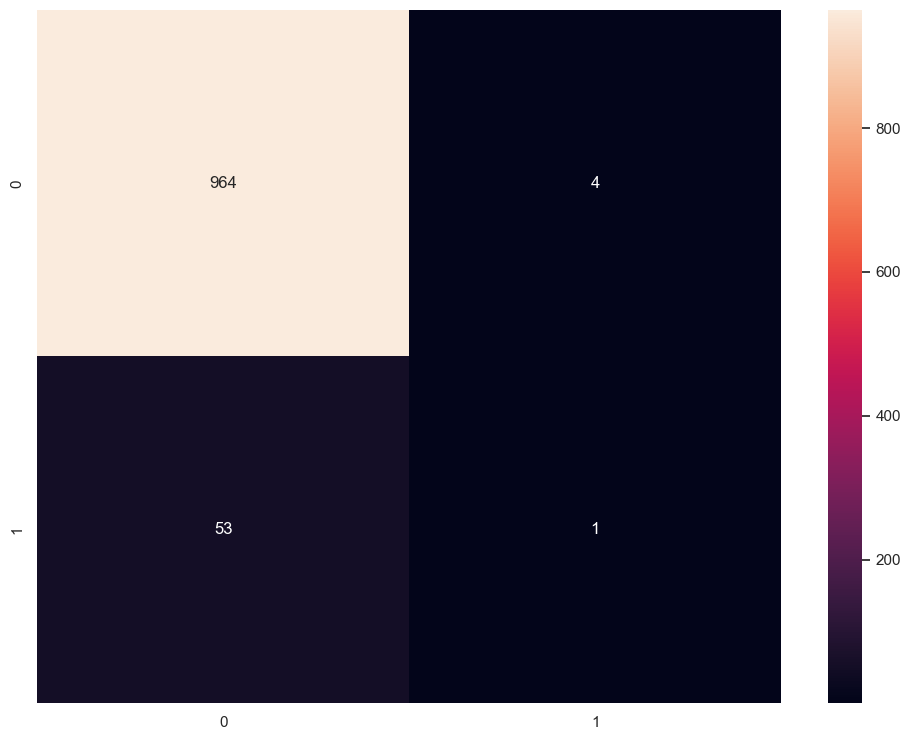

In [141]:
RF_Confusion_matrix = confusion_matrix(y_test, RF_y_preds)
sns.heatmap(RF_Confusion_matrix, annot=True, fmt='g')

In [142]:
print(classification_report(y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.20      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.91      0.94      0.92      1022



# Random Forest (Max 18 features in Bootstraping)

In [143]:
RF_model4 = RandomForestClassifier(max_features=18)
RF_model4.fit(X_train,y_train)
RF_y_preds = RF_model4.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":y_test})
RF_preds

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [144]:
RF_TP4 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP4 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN4 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN4 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP4,RF_FP4,RF_FN4,RF_TN4)
print("Rightly Classified: ",(RF_TP4+RF_TN4),"/",(RF_TP4+RF_FP4+RF_FN4+RF_TN4))
print("Wrongly Classified: ",(RF_FP4+RF_FN4),"/",(RF_TP4+RF_FP4+RF_FN4+RF_TN4))

RF_Accuracy4 = (RF_TP4+RF_TN4)/(RF_TP4+RF_FP4+RF_FN4+RF_TN4)
RF_Precision4 = (RF_TP4)/(RF_TP4+RF_FP4)
RF_Recall4 = (RF_TP4)/(RF_TP4+RF_FN4)
RF_Specificity4 = (RF_TN4)/(RF_TN4+RF_FP4)
# RF_F14 = (2*RF_Precision4*RF_Recall4)/(RF_Precision4+RF_Recall4)

0 3 54 965
Rightly Classified:  965 / 1022
Wrongly Classified:  57 / 1022


<AxesSubplot:>

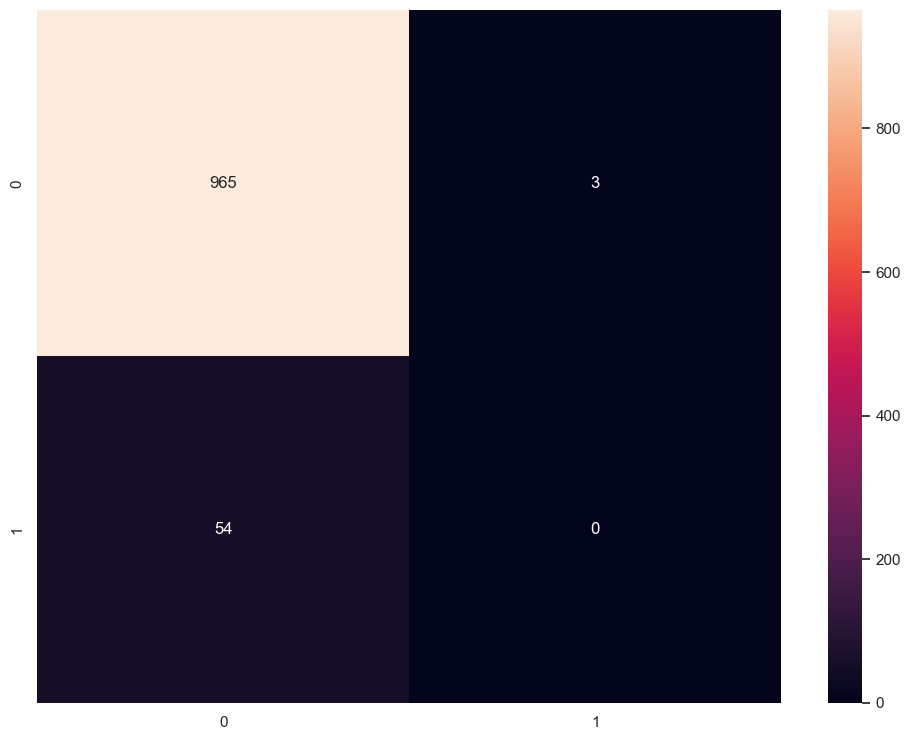

In [145]:
RF_Confusion_matrix = confusion_matrix(y_test, RF_y_preds)
sns.heatmap(RF_Confusion_matrix, annot=True, fmt='g')

In [146]:
print(classification_report(y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022



# Gaussian Naive Bayes

In [147]:
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(X_train,y_train)
GNB_y_preds = GNB_model.predict(X_test)
GNB_preds = pd.DataFrame({"Predicted":GNB_y_preds,"Actual":y_test})
GNB_preds

Predicted  Actual
42          1.0     1.0
3777        0.0     0.0
3792        1.0     0.0
3957        1.0     0.0
4626        1.0     0.0
...         ...     ...
3272        1.0     0.0
4201        0.0     0.0
248         1.0     1.0
4646        1.0     0.0
4920        1.0     0.0

[1022 rows x 2 columns]

In [148]:
GNB_TP = len(GNB_preds[(GNB_preds["Predicted"]==GNB_preds["Actual"])&(GNB_preds["Predicted"]==1)])
GNB_FP = len(GNB_preds[(GNB_preds["Predicted"]!=GNB_preds["Actual"])&(GNB_preds["Predicted"]==1)])
GNB_FN = len(GNB_preds[(GNB_preds["Predicted"]!=GNB_preds["Actual"])&(GNB_preds["Predicted"]==0)])
GNB_TN = len(GNB_preds[(GNB_preds["Predicted"]==GNB_preds["Actual"])&(GNB_preds["Predicted"]==0)])
print(GNB_TP,GNB_FP,GNB_FN,GNB_TN)
print("Rightly Classified: ",(GNB_TP+GNB_TN),"/",(GNB_TP+GNB_FP+GNB_FN+GNB_TN))
print("Wrongly Classified: ",(GNB_FP+GNB_FN),"/",(GNB_TP+GNB_FP+GNB_FN+GNB_TN))

GNB_Accuracy = (GNB_TP+GNB_TN)/(GNB_TP+GNB_FP+GNB_FN+GNB_TN)
GNB_Precision = (GNB_TP)/(GNB_TP+GNB_FP)
GNB_Recall = (GNB_TP)/(GNB_TP+GNB_FN)
GNB_Specificity = (GNB_TN)/(GNB_TN+GNB_FP)
GNB_F1 = (2*GNB_Precision*GNB_Recall)/(GNB_Precision+GNB_Recall)

53 637 1 331
Rightly Classified:  384 / 1022
Wrongly Classified:  638 / 1022


<AxesSubplot:>

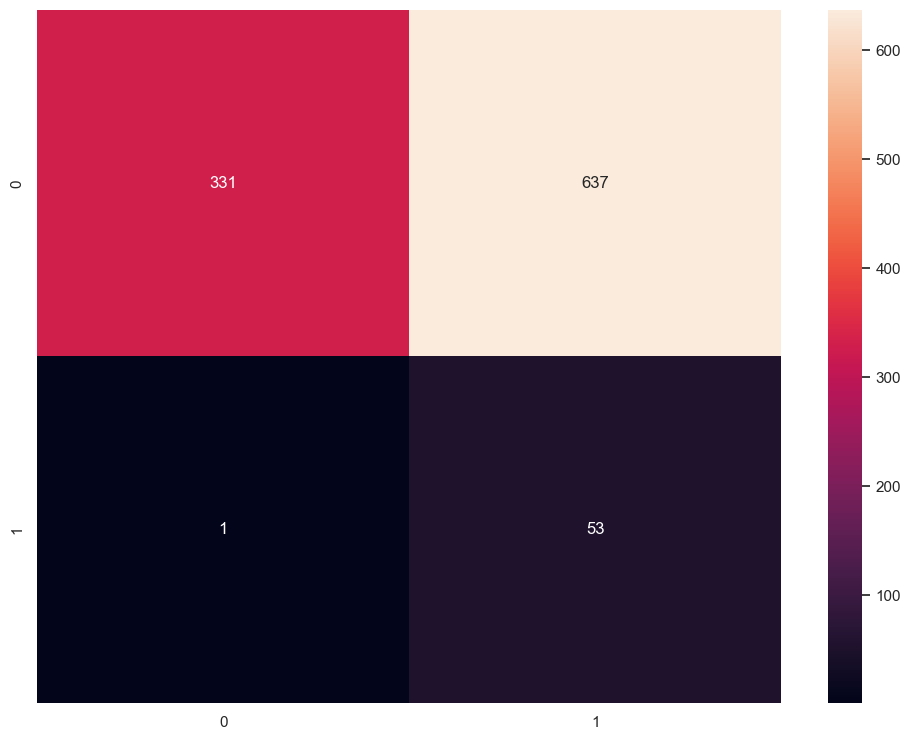

In [149]:
GNB_Confusion_matrix = confusion_matrix(y_test, GNB_y_preds)
sns.heatmap(GNB_Confusion_matrix, annot=True, fmt='g')

In [150]:
print(classification_report(y_test, GNB_y_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.34      0.51       968
         1.0       0.08      0.98      0.14        54

    accuracy                           0.38      1022
   macro avg       0.54      0.66      0.33      1022
weighted avg       0.95      0.38      0.49      1022



# KNN (k=10)

In [151]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model1 = KNeighborsClassifier(n_neighbors=10)
KNN_model1.fit(X_train,y_train)
KNN_y_preds = KNN_model1.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [152]:
KNN_TP1 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP1 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN1 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN1 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP1,KNN_FP1,KNN_FN1,KNN_TN1)
print("Rightly Classified: ",(KNN_TP1+KNN_TN1),"/",(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1))
print("Wrongly Classified: ",(KNN_FP1+KNN_FN1),"/",(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1))

KNN_Accuracy1 = (KNN_TP1+KNN_TN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1)
# KNN_Precision1 = (KNN_TP1)/(KNN_TP1+KNN_FP1)
KNN_Recall1 = (KNN_TP1)/(KNN_TP1+KNN_FN1)
KNN_Specificity1 = (KNN_TN1)/(KNN_TN1+KNN_FP1)
# KNN_F11 = (2*KNN_Precision1*KNN_Recall1)/(KNN_Precision1+KNN_Recall1)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


<AxesSubplot:>

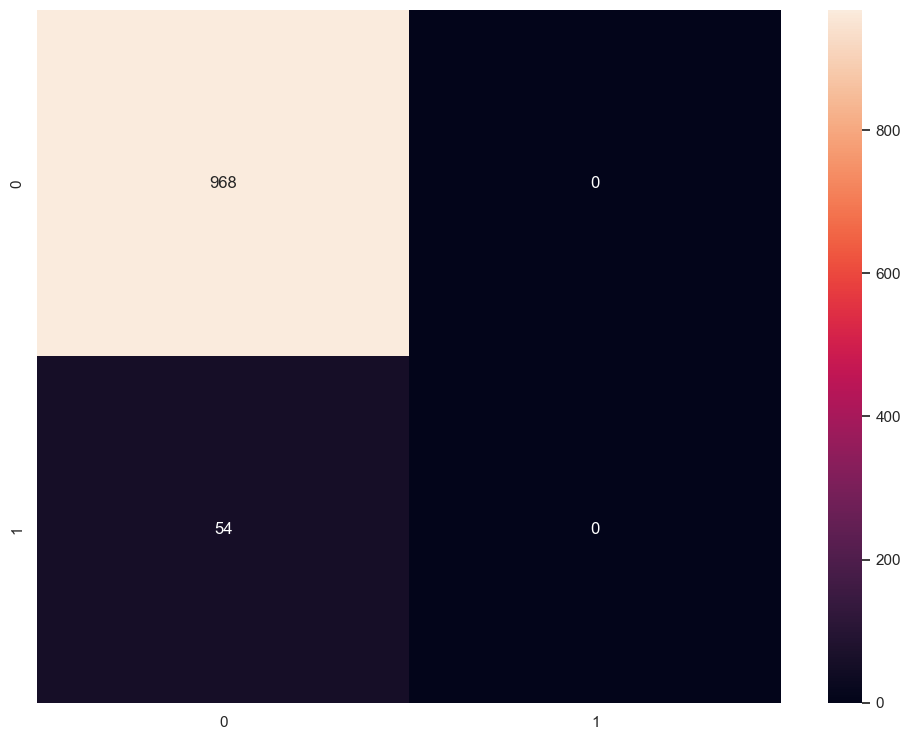

In [153]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [154]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN (k=50)

In [155]:
KNN_model2 = KNeighborsClassifier(n_neighbors=50)
KNN_model2.fit(X_train,y_train)
KNN_y_preds = KNN_model2.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [156]:
KNN_TP2 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP2 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN2 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN2 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP2,KNN_FP2,KNN_FN2,KNN_TN2)
print("Rightly Classified: ",(KNN_TP2+KNN_TN2),"/",(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2))
print("Wrongly Classified: ",(KNN_FP2+KNN_FN2),"/",(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2))

KNN_Accuracy2 = (KNN_TP2+KNN_TN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2)
# KNN_Precision2 = (KNN_TP2)/(KNN_TP2+KNN_FP2)
KNN_Recall2 = (KNN_TP2)/(KNN_TP2+KNN_FN2)
KNN_Specificity2 = (KNN_TN2)/(KNN_TN2+KNN_FP2)
# KNN_F12 = (2*KNN_Precision2*KNN_Recall2)/(KNN_Precision2+KNN_Recall2)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


<AxesSubplot:>

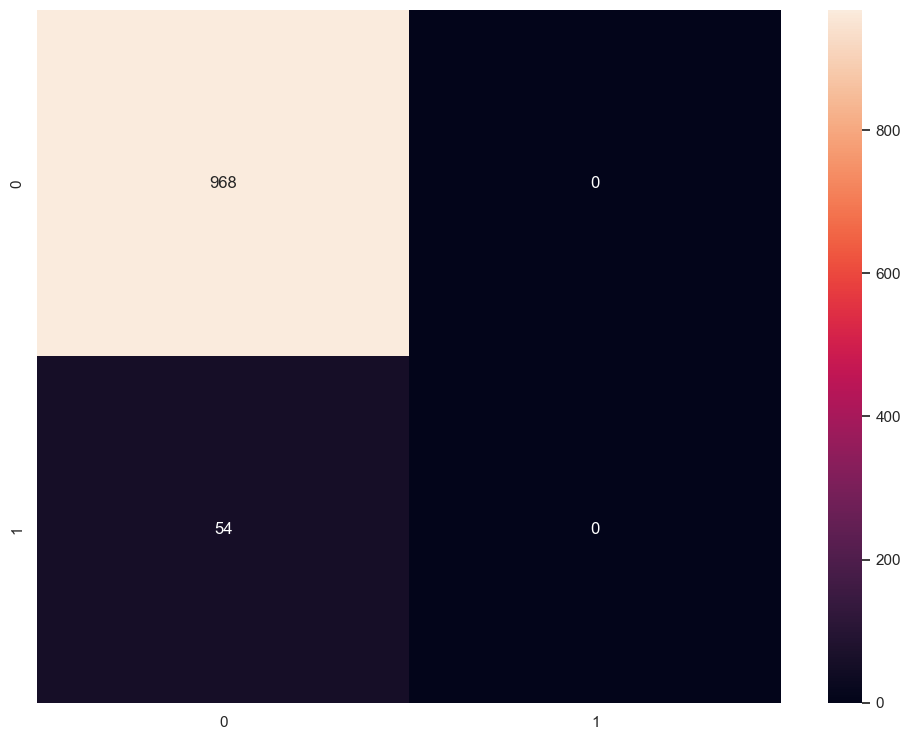

In [157]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [158]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN (k=200)

In [159]:
KNN_model3 = KNeighborsClassifier(n_neighbors=200)
KNN_model3.fit(X_train,y_train)
KNN_y_preds = KNN_model3.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [160]:
KNN_TP3 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP3 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN3 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN3 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP3,KNN_FP3,KNN_FN3,KNN_TN3)
print("Rightly Classified: ",(KNN_TP3+KNN_TN3),"/",(KNN_TP3+KNN_FP3+KNN_FN3+KNN_TN3))
print("Wrongly Classified: ",(KNN_FP3+KNN_FN3),"/",(KNN_TP3+KNN_FP3+KNN_FN3+KNN_TN3))

KNN_Accuracy3 = (KNN_TP3+KNN_TN3)/(KNN_TP3+KNN_FP3+KNN_FN3+KNN_TN3)
# KNN_Precision3 = (KNN_TP3)/(KNN_TP3+KNN_FP3)
KNN_Recall3 = (KNN_TP3)/(KNN_TP3+KNN_FN3)
KNN_Specificity3 = (KNN_TN3)/(KNN_TN3+KNN_FP3)
# KNN_F13 = (2*KNN_Precision3*KNN_Recall3)/(KNN_Precision3+KNN_Recall3)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


<AxesSubplot:>

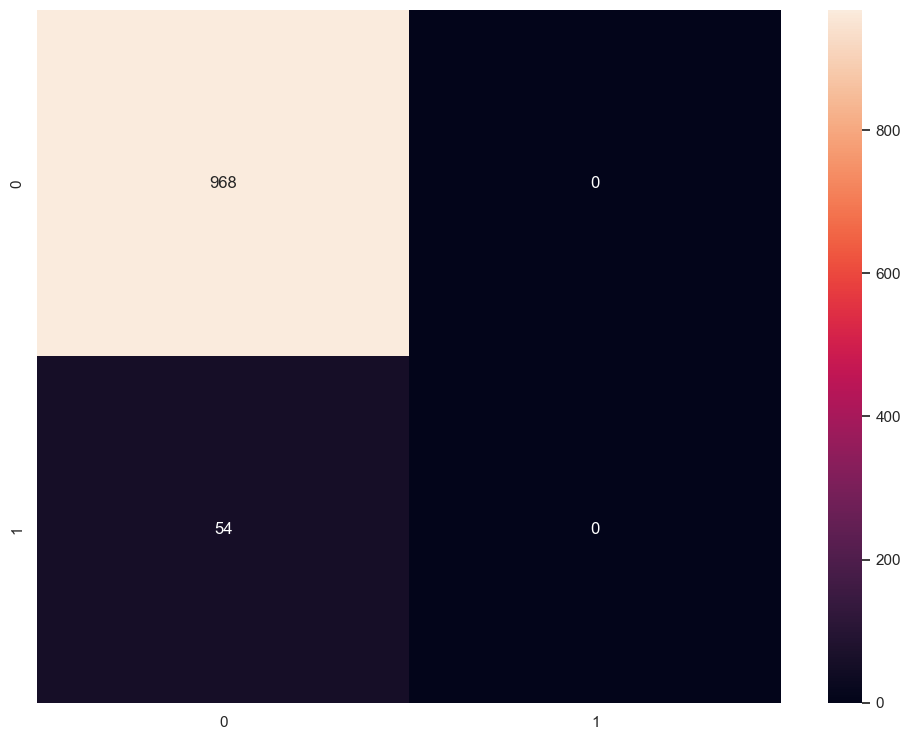

In [161]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [162]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN (k=500)

In [163]:
KNN_model4 = KNeighborsClassifier(n_neighbors=500)
KNN_model4.fit(X_train,y_train)
KNN_y_preds = KNN_model4.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [164]:
KNN_TP4 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP4 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN4 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN4 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP4,KNN_FP4,KNN_FN4,KNN_TN4)
print("Rightly Classified: ",(KNN_TP4+KNN_TN4),"/",(KNN_TP4+KNN_FP4+KNN_FN4+KNN_TN4))
print("Wrongly Classified: ",(KNN_FP4+KNN_FN4),"/",(KNN_TP4+KNN_FP4+KNN_FN4+KNN_TN4))

KNN_Accuracy4 = (KNN_TP4+KNN_TN4)/(KNN_TP4+KNN_FP4+KNN_FN4+KNN_TN4)
# KNN_Precision4 = (KNN_TP4)/(KNN_TP4+KNN_FP4)
KNN_Recall4 = (KNN_TP4)/(KNN_TP4+KNN_FN4)
KNN_Specificity4 = (KNN_TN4)/(KNN_TN4+KNN_FP4)
# KNN_F14 = (2*KNN_Precision4*KNN_Recall4)/(KNN_Precision4+KNN_Recall4)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


<AxesSubplot:>

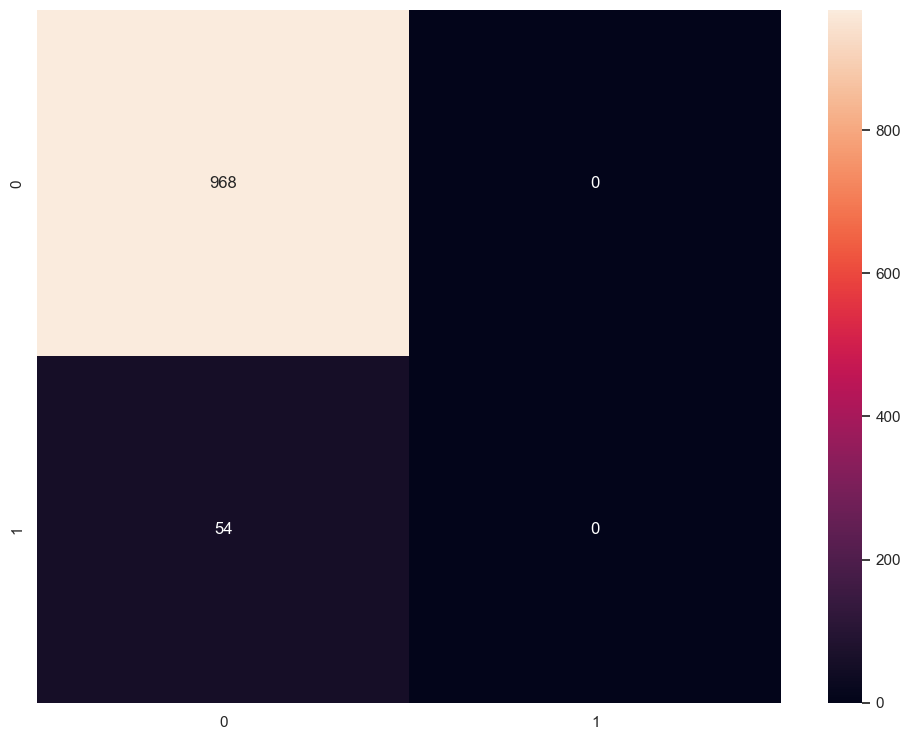

In [165]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [166]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN (k=1000)

In [167]:
KNN_model5 = KNeighborsClassifier(n_neighbors=1000)
KNN_model5.fit(X_train,y_train)
KNN_y_preds = KNN_model5.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [168]:
KNN_TP5 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP5 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN5 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN5 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP5,KNN_FP5,KNN_FN5,KNN_TN5)
print("Rightly Classified: ",(KNN_TP5+KNN_TN5),"/",(KNN_TP5+KNN_FP5+KNN_FN5+KNN_TN5))
print("Wrongly Classified: ",(KNN_FP5+KNN_FN5),"/",(KNN_TP5+KNN_FP5+KNN_FN5+KNN_TN5))

KNN_Accuracy5 = (KNN_TP5+KNN_TN5)/(KNN_TP5+KNN_FP5+KNN_FN5+KNN_TN5)
# KNN_Precision5 = (KNN_TP5)/(KNN_TP5+KNN_FP5)
KNN_Recall5 = (KNN_TP5)/(KNN_TP5+KNN_FN5)
KNN_Specificity5 = (KNN_TN5)/(KNN_TN5+KNN_FP5)
# KNN_F15 = (2*KNN_Precision5*KNN_Recall5)/(KNN_Precision5+KNN_Recall5)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


<AxesSubplot:>

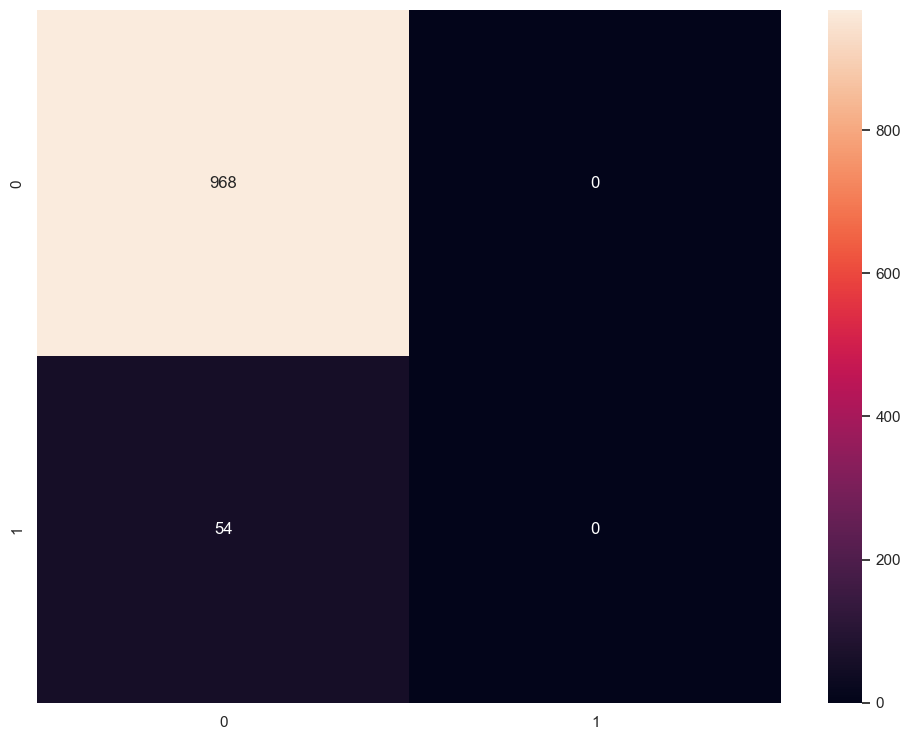

In [169]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [170]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN (k=4000)

In [171]:
KNN_model6 = KNeighborsClassifier(n_neighbors=4000)
KNN_model6.fit(X_train,y_train)
KNN_y_preds = KNN_model6.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":y_test})
KNN_preds

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [172]:
y_train.value_counts()

0.0    3891
1.0     193
Name: stroke, dtype: int64

In [173]:
KNN_TP6 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP6 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN6 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN6 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP6,KNN_FP6,KNN_FN6,KNN_TN6)
print("Rightly Classified: ",(KNN_TP6+KNN_TN6),"/",(KNN_TP6+KNN_FP6+KNN_FN6+KNN_TN6))
print("Wrongly Classified: ",(KNN_FP6+KNN_FN6),"/",(KNN_TP6+KNN_FP6+KNN_FN6+KNN_TN6))

KNN_Accuracy6 = (KNN_TP6+KNN_TN6)/(KNN_TP6+KNN_FP6+KNN_FN6+KNN_TN6)
# KNN_Precision6 = (KNN_TP6)/(KNN_TP6+KNN_FP6)
KNN_Recall6 = (KNN_TP6)/(KNN_TP6+KNN_FN6)
KNN_Specificity6 = (KNN_TN6)/(KNN_TN6+KNN_FP6)
# KNN_F16 = (2*KNN_Precision6*KNN_Recall6)/(KNN_Precision6+KNN_Recall6)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


<AxesSubplot:>

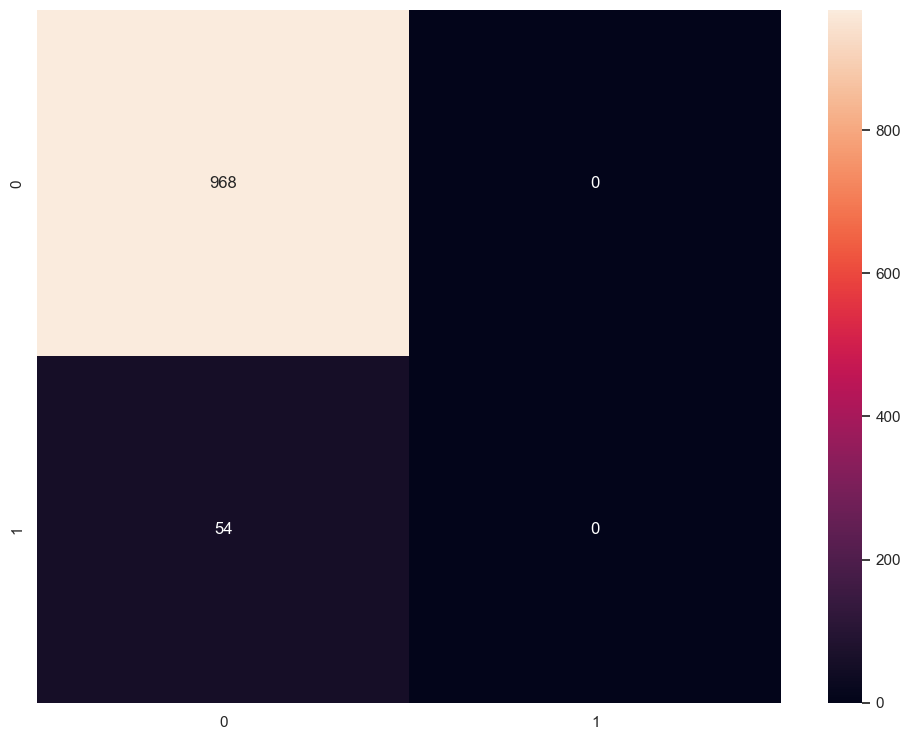

In [174]:
KNN_Confusion_matrix = confusion_matrix(y_test, KNN_y_preds)
sns.heatmap(KNN_Confusion_matrix, annot=True, fmt='g')

In [175]:
print(classification_report(y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM (Support Vector Machine)

In [176]:
from sklearn import svm

SVM_model = svm.SVC()
SVM_model.fit(X_train,y_train)
SVM_y_preds = SVM_model.predict(X_test)
SVM_preds = pd.DataFrame({"Predicted":SVM_y_preds,"Actual":y_test})
SVM_preds

Predicted  Actual
42          0.0     1.0
3777        0.0     0.0
3792        0.0     0.0
3957        0.0     0.0
4626        0.0     0.0
...         ...     ...
3272        0.0     0.0
4201        0.0     0.0
248         0.0     1.0
4646        0.0     0.0
4920        0.0     0.0

[1022 rows x 2 columns]

In [177]:
SVM_TP = len(SVM_preds[(SVM_preds["Predicted"]==SVM_preds["Actual"])&(SVM_preds["Predicted"]==1)])
SVM_FP = len(SVM_preds[(SVM_preds["Predicted"]!=SVM_preds["Actual"])&(SVM_preds["Predicted"]==1)])
SVM_FN = len(SVM_preds[(SVM_preds["Predicted"]!=SVM_preds["Actual"])&(SVM_preds["Predicted"]==0)])
SVM_TN = len(SVM_preds[(SVM_preds["Predicted"]==SVM_preds["Actual"])&(SVM_preds["Predicted"]==0)])
print(SVM_TP,SVM_FP,SVM_FN,SVM_TN)
print("Rightly Classified: ",(SVM_TP+SVM_TN),"/",(SVM_TP+SVM_FP+SVM_FN+SVM_TN))
print("Wrongly Classified: ",(SVM_FP+SVM_FN),"/",(SVM_TP+SVM_FP+SVM_FN+SVM_TN))

SVM_Accuracy = (SVM_TP+SVM_TN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN)
# SVM_Precision = (SVM_TP)/(SVM_TP+SVM_FP)
SVM_Recall = (SVM_TP)/(SVM_TP+SVM_FN)
SVM_Specificity = (SVM_TN)/(SVM_TN+SVM_FP)
# SVM_F1 = (2*SVM_Precision*SVM_Recall)/(SVM_Precision+SVM_Recall)

0 0 54 968
Rightly Classified:  968 / 1022
Wrongly Classified:  54 / 1022


<AxesSubplot:>

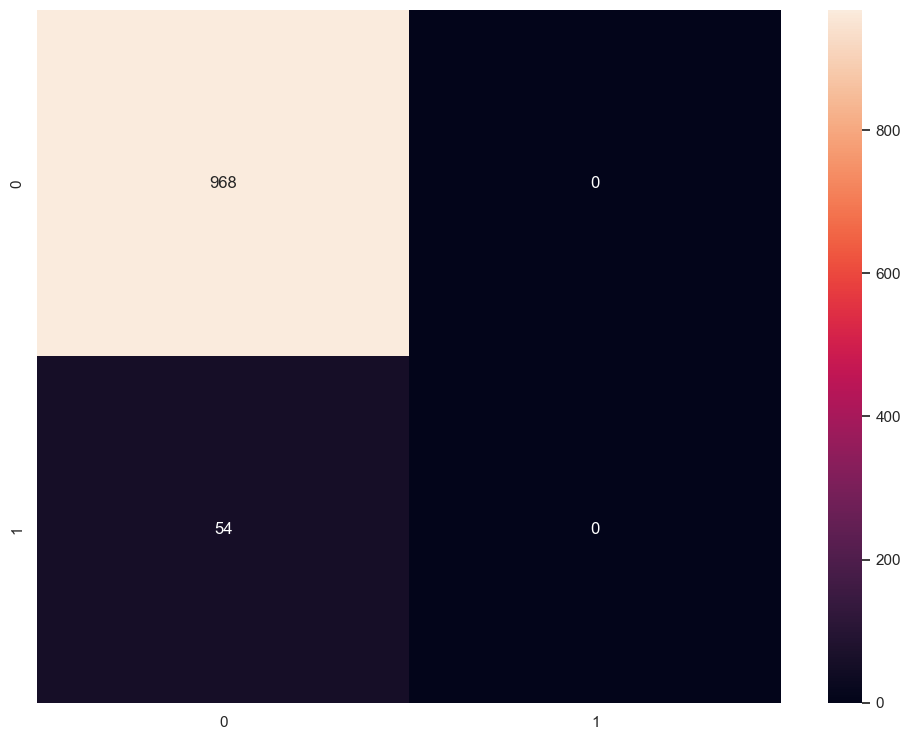

In [178]:
SVM_Confusion_matrix = confusion_matrix(y_test, SVM_y_preds)
sns.heatmap(SVM_Confusion_matrix, annot=True, fmt='g')

In [179]:
print(classification_report(y_test, SVM_y_preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-Means Clustering

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

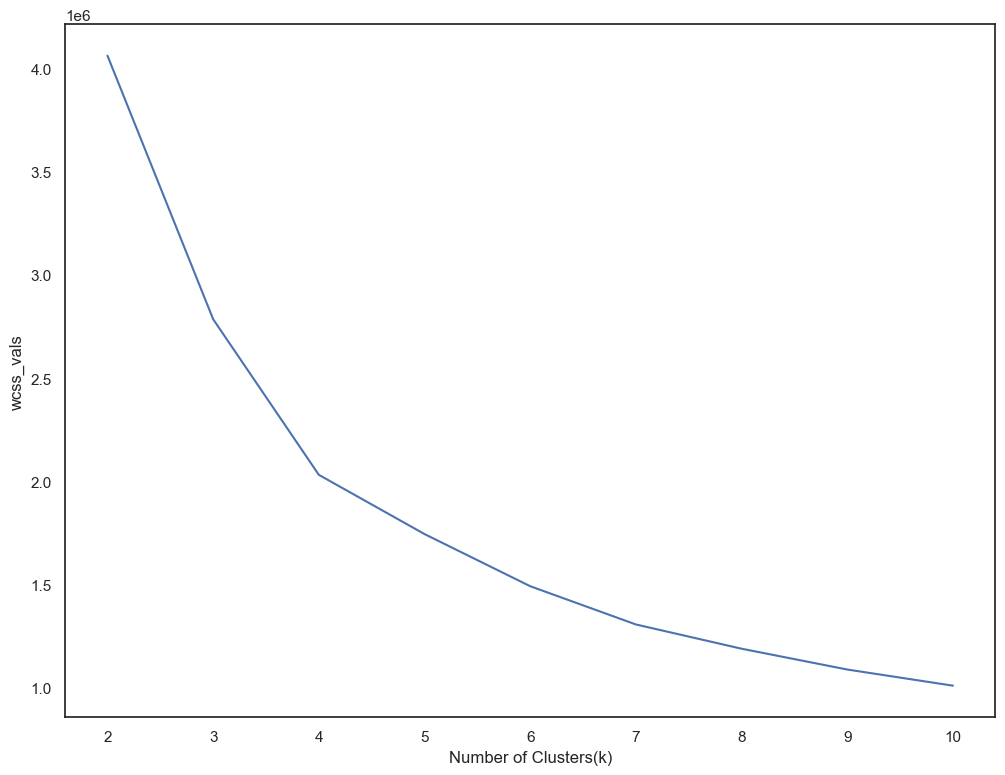

In [180]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
i_vals = []

for i in range(2,11):
  i_vals.append(i)
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

plt.plot(i_vals,wcss)
plt.xlabel('Number of Clusters(k)')  
plt.ylabel('wcss_vals')  
plt.show()

In [181]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,init="random",random_state=42)
kmeans.fit(X_train)
KMeans_y_preds = kmeans.predict(X_test)
KMeans_preds = pd.DataFrame({"Predicted":KMeans_y_preds,"Actual":y_test})


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [182]:
Kmeans_TP = len(KMeans_preds[(KMeans_preds["Predicted"]==KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==1)])
Kmeans_FP = len(KMeans_preds[(KMeans_preds["Predicted"]!=KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==1)])
Kmeans_FN = len(KMeans_preds[(KMeans_preds["Predicted"]!=KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==0)])
Kmeans_TN = len(KMeans_preds[(KMeans_preds["Predicted"]==KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==0)])
print(Kmeans_TP,Kmeans_FP,Kmeans_FN,Kmeans_TN)
print("Rightly Classified: ",(Kmeans_TP+Kmeans_TN),"/",(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN))
print("Wrongly Classified: ",(Kmeans_FP+Kmeans_FN),"/",(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN))

Kmeans_Accuracy = (Kmeans_TP+Kmeans_TN)/(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN)
Kmeans_Precision = (Kmeans_TP)/(Kmeans_TP+Kmeans_FP)
Kmeans_Recall = (Kmeans_TP)/(Kmeans_TP+Kmeans_FN)
Kmeans_Specificity = (Kmeans_TN)/(Kmeans_TN+Kmeans_FP)
Kmeans_F1 = (2*Kmeans_Precision*Kmeans_Recall)/(Kmeans_Precision+Kmeans_Recall)

29 117 25 851
Rightly Classified:  880 / 1022
Wrongly Classified:  142 / 1022


<AxesSubplot:>

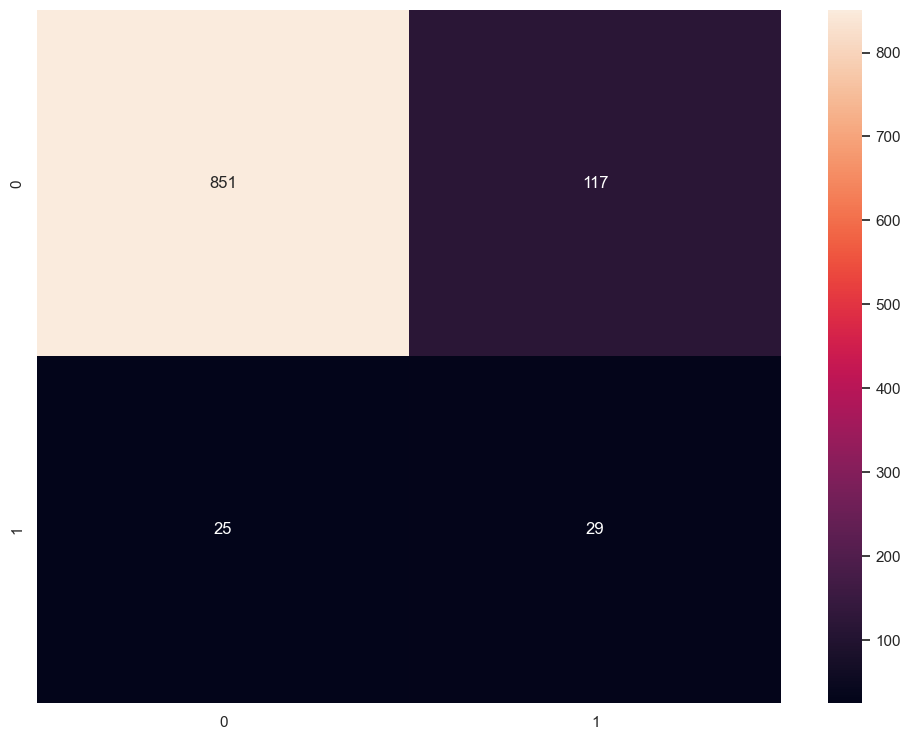

In [183]:
Kmeans_Confusion_matrix = confusion_matrix(y_test, KMeans_y_preds)
sns.heatmap(Kmeans_Confusion_matrix, annot=True, fmt='g')

In [184]:
print(classification_report(y_test, KMeans_y_preds))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       968
         1.0       0.20      0.54      0.29        54

    accuracy                           0.86      1022
   macro avg       0.59      0.71      0.61      1022
weighted avg       0.93      0.86      0.89      1022



# Agglomerative Clustering

In [185]:
from sklearn.cluster import AgglomerativeClustering

Acluster = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
Acluster.fit(X_train)
Acluster_y_preds = Acluster.fit_predict(X_test)
Acluster_preds = pd.DataFrame({"Predicted":Acluster_y_preds,"Actual":y_test})
Acluster_preds

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Predicted  Actual
42            0     1.0
3777          0     0.0
3792          0     0.0
3957          0     0.0
4626          0     0.0
...         ...     ...
3272          0     0.0
4201          1     0.0
248           0     1.0
4646          0     0.0
4920          0     0.0

[1022 rows x 2 columns]

In [186]:
Acluster_TP = len(Acluster_preds[(Acluster_preds["Predicted"]==Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==1)])
Acluster_FP = len(Acluster_preds[(Acluster_preds["Predicted"]!=Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==1)])
Acluster_FN = len(Acluster_preds[(Acluster_preds["Predicted"]!=Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==0)])
Acluster_TN = len(Acluster_preds[(Acluster_preds["Predicted"]==Acluster_preds["Actual"])&(Acluster_preds["Predicted"]==0)])
print(Acluster_TP,Acluster_FP,Acluster_FN,Acluster_TN)
print("Rightly Classified: ",(Acluster_TP+Acluster_TN),"/",(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN))
print("Wrongly Classified: ",(Acluster_FP+Acluster_FN),"/",(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN))

Acluster_Accuracy = (Acluster_TP+Acluster_TN)/(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN)
Acluster_Precision = (Acluster_TP)/(Acluster_TP+Acluster_FP)
Acluster_Recall = (Acluster_TP)/(Acluster_TP+Acluster_FN)
Acluster_Specificity = (Acluster_TN)/(Acluster_TN+Acluster_FP)
Acluster_F1 = (2*Acluster_Precision*Acluster_Recall)/(Acluster_Precision+Acluster_Recall)

27 88 27 880
Rightly Classified:  907 / 1022
Wrongly Classified:  115 / 1022


<AxesSubplot:>

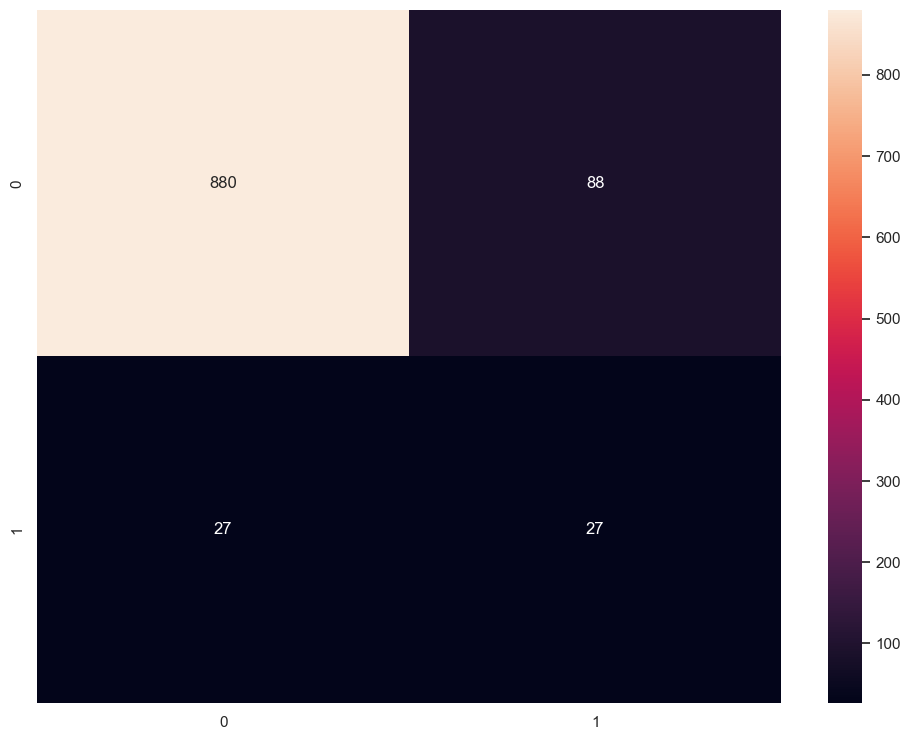

In [187]:
Acluster_Confusion_matrix = confusion_matrix(y_test, Acluster_y_preds)
sns.heatmap(Acluster_Confusion_matrix, annot=True, fmt='g')

In [188]:
print(classification_report(y_test, Acluster_y_preds))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       968
         1.0       0.23      0.50      0.32        54

    accuracy                           0.89      1022
   macro avg       0.60      0.70      0.63      1022
weighted avg       0.93      0.89      0.91      1022



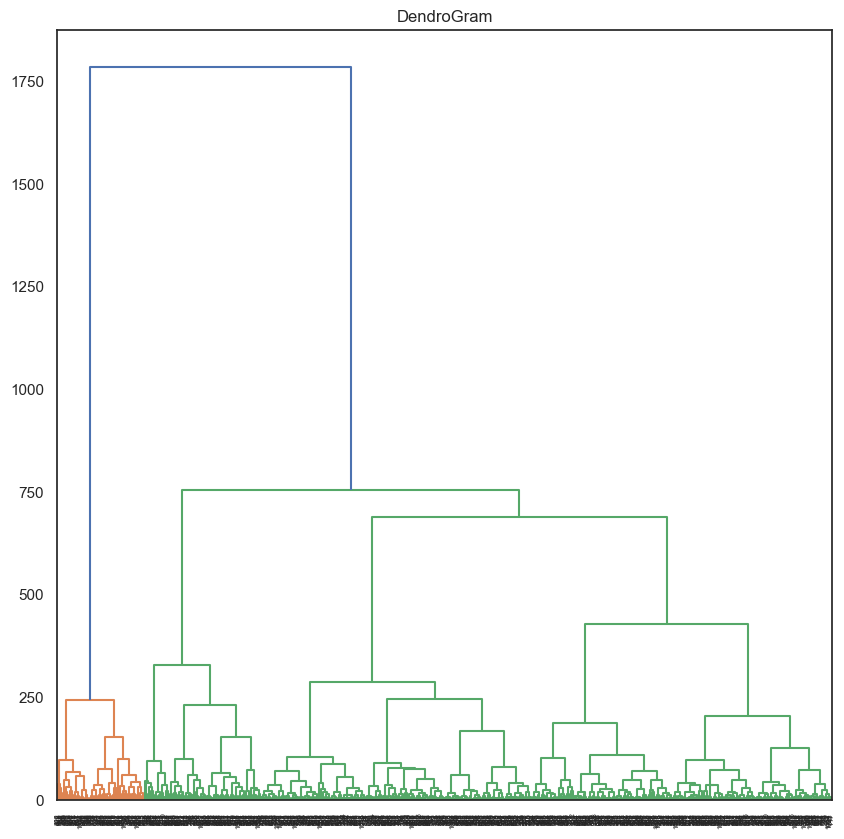

In [189]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,10))
plt.title("DendroGram")
dendo = shc.dendrogram(shc.linkage(X_test,method="ward"))

In [190]:
X_test

age  hypertension  heart_disease  avg_glucose_level   bmi  \
42    82.0           0.0            1.0             144.90  26.4   
3777  17.0           0.0            0.0              68.66  35.1   
3792  74.0           0.0            0.0             130.37  26.3   
3957  38.0           0.0            0.0              98.37  27.2   
4626  33.0           0.0            0.0              90.73  32.8   
...    ...           ...            ...                ...   ...   
3272  46.0           0.0            0.0             102.27  38.9   
4201  43.0           0.0            0.0             207.37  29.5   
248   78.0           0.0            0.0              78.81  19.6   
4646  63.0           0.0            0.0              93.88  34.8   
4920  75.0           0.0            0.0              68.38  33.8   

      gender_Female  gender_Male  gender_Other  ever_married_No  \
42              0.0          1.0           0.0              0.0   
3777            1.0          0.0           0.0              0.0   
3792            0.0          1.0           0.0              0.0   
3957            1.0          0.0           0.0              1.0   
4626            1.0          0.0           0.0              0.0   
...             ...          ...           ...              ...   
3272            1.0          0.0           0.0              0.0   
4201            1.0          0.0           0.0              1.0   
248             0.0          1.0           0.0              0.0   
4646            1.0          0.0           0.0              0.0   
4920            1.0          0.0           0.0              0.0   

      ever_married_Yes  ...  work_type_Never_worked  work_type_Private  \
42                 1.0  ...                     0.0                1.0   
3777               1.0  ...                     0.0                0.0   
3792               1.0  ...                     0.0                1.0   
3957               0.0  ...                     0.0                1.0   
4626               1.0  ...                     0.0                0.0   
...                ...  ...                     ...                ...   
3272               1.0  ...                     0.0                0.0   
4201               0.0  ...                     0.0                0.0   
248                1.0  ...                     0.0                1.0   
4646               1.0  ...                     0.0                1.0   
4920               1.0  ...                     0.0                0.0   

      work_type_Self-employed  work_type_children  Residence_type_Rural  \
42                        0.0                 0.0                   0.0   
3777                      0.0                 0.0                   0.0   
3792                      0.0                 0.0                   1.0   
3957                      0.0                 0.0                   0.0   
4626                      1.0                 0.0                   1.0   
...                       ...                 ...                   ...   
3272                      1.0                 0.0                   0.0   
4201                      0.0                 1.0                   1.0   
248                       0.0                 0.0                   0.0   
4646                      0.0                 0.0                   0.0   
4920                      0.0                 0.0                   0.0   

      Residence_type_Urban  smoking_status_Unknown  \
42                     1.0                     0.0   
3777                   1.0                     0.0   
3792                   0.0                     0.0   
3957                   1.0                     0.0   
4626                   0.0                     0.0   
...                    ...                     ...   
3272                   1.0                     0.0   
4201                   0.0                     1.0   
248                    1.0                     0.0   
4646                   1.0                     0.0   
4

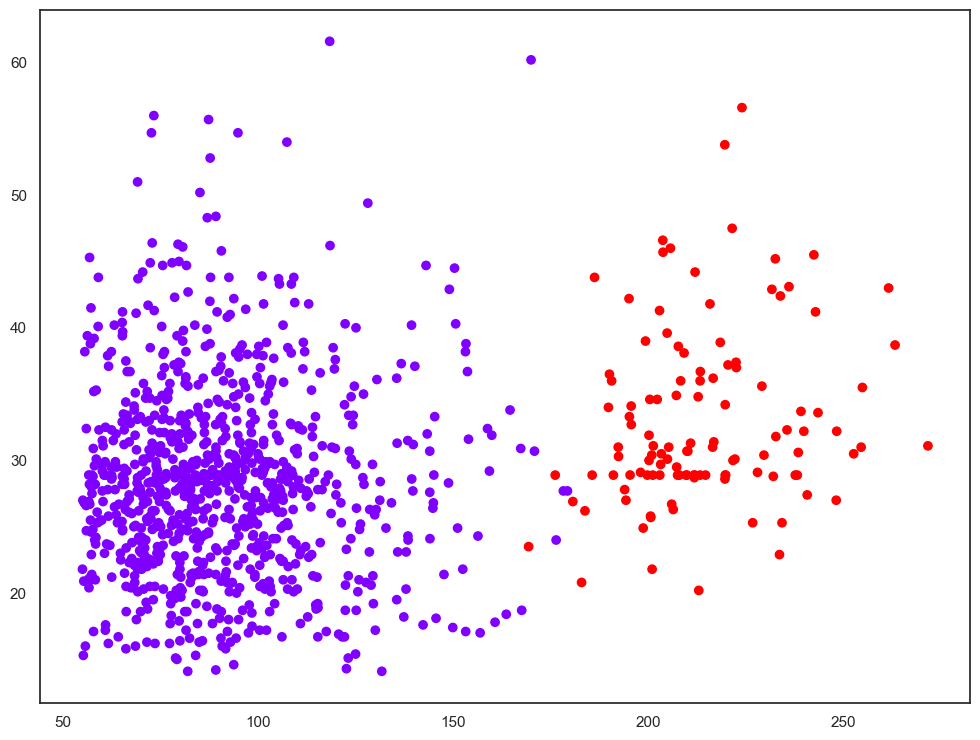

In [191]:
plt.scatter(X_test["avg_glucose_level"].values,X_test["bmi"].values,c=Acluster.labels_,cmap ='rainbow')

# Final Comparison

In [192]:
comparison = pd.DataFrame({"ML Classification Algo":["Decision_Tree","LGBM Classifier","CatBoost Classifier (1000 iterations)","CatBoost Classifier (300 iterations)","XGBoosting","Logistic Regression","Random Forest (Max 2 features in Bootstraping)","Random Forest (Max 5 features in Bootstraping)","Random Forest (Max 10 features in Bootstraping)","Random Forest (Max 18 features in Bootstraping)","Gaussian Naive Bayes","KNN (k=10)","KNN (k=50)","KNN (k=200)","KNN (k=500)","KNN (k=1000)","KNN (k=4000)","SVM (Support Vector Machine)","K-Means Clustering","Agglomerative Clustering"],
 "Rightly_Classified":[(Decision_TP+Decision_TN)/(Decision_TP+Decision_FP+Decision_FN+Decision_TN),(LGBM_TP+LGBM_TN)/(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN),(CatBoost_TP+CatBoost_TN)/(CatBoost_TP+CatBoost_FP+CatBoost_FN+CatBoost_TN),(CatBoost_TP2+CatBoost_TN2)/(CatBoost_TP2+CatBoost_FP2+CatBoost_FN2+CatBoost_TN2),(XGB_TP+XGB_TN)/(XGB_TP+XGB_FP+XGB_FN+XGB_TN),(Log_TP+Log_TN)/(Log_TP+Log_FP+Log_FN+Log_TN),(RF_TP1+RF_TN1)/(RF_TP1+RF_FP1+RF_FN1+RF_TN1),(RF_TP2+RF_TN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2),(RF_TP3+RF_TN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3),(RF_TP4+RF_TN4)/(RF_TP4+RF_FP4+RF_FN4+RF_TN4),(GNB_TP+GNB_TN)/(GNB_TP+GNB_FP+GNB_FN+GNB_TN),(KNN_TP1+KNN_TN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1),(KNN_TP2+KNN_TN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2),(KNN_TP3+KNN_TN3)/(KNN_TP3+KNN_FP3+KNN_FN3+KNN_TN3),(KNN_TP4+KNN_TN4)/(KNN_TP4+KNN_FP4+KNN_FN4+KNN_TN4),(KNN_TP5+KNN_TN5)/(KNN_TP5+KNN_FP5+KNN_FN5+KNN_TN5),(KNN_TP6+KNN_TN6)/(KNN_TP6+KNN_FP6+KNN_FN6+KNN_TN6),(SVM_TP+SVM_TN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN),(Kmeans_TP+Kmeans_TN)/(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN),(Acluster_TP+Acluster_TN)/(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN)],
 "Wrongly_Classified":[(Decision_FP+Decision_FN)/(Decision_TP+Decision_FP+Decision_FN+Decision_TN),(LGBM_FP+LGBM_FN)/(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN),(CatBoost_FP+CatBoost_FN)/(CatBoost_TP+CatBoost_FP+CatBoost_FN+CatBoost_TN),(CatBoost_FP2+CatBoost_FN2)/(CatBoost_TP2+CatBoost_FP2+CatBoost_FN2+CatBoost_TN2),(XGB_FP+XGB_FN)/(XGB_TP+XGB_FP+XGB_FN+XGB_TN),(Log_FP+Log_FN)/(Log_TP+Log_FP+Log_FN+Log_TN),(RF_FP1+RF_FN1)/(RF_TP1+RF_FP1+RF_FN1+RF_TN1),(RF_FP2+RF_FN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2),(RF_FP3+RF_FN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3),(RF_FP4+RF_FN4)/(RF_TP4+RF_FP4+RF_FN4+RF_TN4),(GNB_FP+GNB_FN)/(GNB_TP+GNB_FP+GNB_FN+GNB_TN),(KNN_FP1+KNN_FN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1),(KNN_FP2+KNN_FN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2),(KNN_FP3+KNN_FN3)/(KNN_TP3+KNN_FP3+KNN_FN3+KNN_TN3),(KNN_FP4+KNN_FN4)/(KNN_TP4+KNN_FP4+KNN_FN4+KNN_TN4),(KNN_FP5+KNN_FN5)/(KNN_TP5+KNN_FP5+KNN_FN5+KNN_TN5),(KNN_FP6+KNN_FN6)/(KNN_TP6+KNN_FP6+KNN_FN6+KNN_TN6),(SVM_FP+SVM_FN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN),(Kmeans_FP+Kmeans_FN)/(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN),(Acluster_FP+Acluster_FN)/(Acluster_TP+Acluster_FP+Acluster_FN+Acluster_TN)],
 "Accuracy":[Decision_Accuracy,LGBM_Accuracy,CatBoost_Accuracy,CatBoost_Accuracy2,XGB_Accuracy,Log_Accuracy,RF_Accuracy1,RF_Accuracy2,RF_Accuracy3,RF_Accuracy4,GNB_Accuracy,KNN_Accuracy1,KNN_Accuracy2,KNN_Accuracy3,KNN_Accuracy4,KNN_Accuracy5,KNN_Accuracy6,SVM_Accuracy,Kmeans_Accuracy,Acluster_Accuracy],
#  "Precision":[Decision_Precision,LGBM_Precision,CatBoost_Precision,CatBoost_Precision2,XGB_Precision,Log_Precision,RF_Precision1,RF_Precision2,RF_Precision3,RF_Precision4,GNB_Precision,KNN_Precision1,KNN_Precision2,KNN_Precision3,KNN_Precision4,KNN_Precision5,KNN_Precision6,SVM_Precision,Kmeans_Precision,Acluster_Precision],
 "Recall":[Decision_Recall,LGBM_Recall,CatBoost_Recall,CatBoost_Recall2,XGB_Recall,Log_Recall,RF_Recall1,RF_Recall2,RF_Recall3,RF_Recall4,GNB_Recall,KNN_Recall1,KNN_Recall2,KNN_Recall3,KNN_Recall4,KNN_Recall5,KNN_Recall6,SVM_Recall,Kmeans_Recall,Acluster_Recall],
 "Specificity":[Decision_Specificity,LGBM_Specificity,CatBoost_Specificity,CatBoost_Specificity2,XGB_Specificity,Log_Specificity,RF_Specificity1,RF_Specificity2,RF_Specificity3,RF_Specificity4,GNB_Specificity,KNN_Specificity1,KNN_Specificity2,KNN_Specificity3,KNN_Specificity4,KNN_Specificity5,KNN_Specificity6,SVM_Specificity,Kmeans_Specificity,Acluster_Specificity]})
#  "F1-Score":[Decision_F1,LGBM_F1,CatBoost_F1,CatBoost_F12,XGB_F1,Log_F1,RF_F11,RF_F12,RF_F13,RF_F14,GNB_F1,KNN_F11,KNN_F12,KNN_F13,KNN_F14,KNN_F15,KNN_F16,SVM_F1,Kmeans_F1,Acluster_F1]})

comparison.sort_values(by="Accuracy",ascending=False).style.background_gradient(cmap='rocket')